In [24]:
import numpy as np
import numpy.linalg as la
import matplotlib as mp
import matplotlib.pyplot as plt
import scienceplots
import scipy
import math
import scipy.linalg as sla
from scipy.integrate import quad
from scipy.interpolate import interp1d
import kwant
import mpmath
from matplotlib.colors import LogNorm

plt.style.use(['science'])

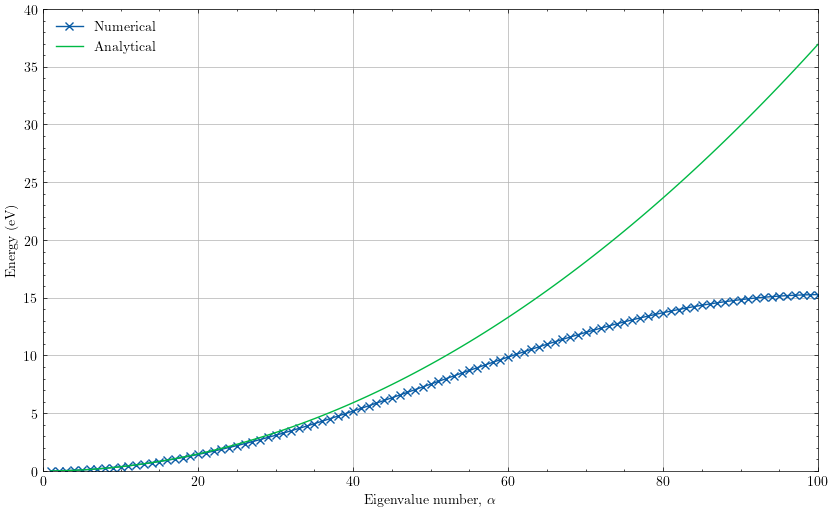

In [8]:
plt.figure(figsize=(10,6))

hbar = 6.626e-34/(2*np.pi)
a = 1e-10
m = 9.1e-31
t_0 = hbar**2/(2*m*a**2)
eV = 1.6e-19
N = 100
H = 2*t_0*np.diag(np.ones(N),0) - t_0*np.diag(np.ones(N-1),1) - t_0*np.diag(np.ones(N-1),-1)
E, psi = np.linalg.eig(H)
theo_E = [0]*N
for i in range(0, N):
  theo_E[i] = (hbar*np.pi*(i+1))**2/(2*m*((N+1)*a)**2)/eV

index = np.argsort(E)
sort_E = np.sort(E[index])
sort_psi = psi[:,index]

plt.xlim(0,N)
plt.ylim(0,40)
plt.plot(range(1, N+1), sort_E/eV, marker='x', label = 'Numerical')
plt.plot(range(1, N+1), theo_E, label = 'Analytical')
plt.ylabel('Energy (eV)')
plt.xlabel('Eigenvalue number, 'r'$\alpha$')
plt.legend(loc='best')
plt.grid(True)
plt.savefig("discrete_PIB.png")
plt.show()

In [ ]:
plt.xlim(0,N)
plt.ylim(0,0.02)
plt.plot(range(1, N+1), sort_psi[0]**2, label=r'$\alpha$ = 1')
plt.plot(range(1, N+1), sort_psi[24]**2, label=r'$\alpha$ = 25')
plt.legend(loc='upper right')
plt.xlabel('Lattice site number')
plt.ylabel('Probability')
plt.show()

In [ ]:
hbar = 1.055e-34
m = 9.110e-31
epsil = 8.854e-12
q = 1.602e-19
a0 = 4*np.pi*epsil*hbar**2/(m*q**2)
E0 = q/(8*np.pi*epsil*a0)

N = 100
a = (5e-10/N)
R = a*np.arange(1, N+1)
t0 = (hbar**2)/(2*m*(a**2))/q

n = 1
l = 0

K = (2*t0*np.diag(np.ones(N))) - (t0*np.diag(np.ones(N-1), 1)) - (t0*np.diag(np.ones(N-1), -1))
U = (-q/(4*np.pi*epsil)/R) + (l*(l+1)*hbar**2/(2*m*q))/R**2
U = np.diag(U)
D, V = np.linalg.eig(K + U)
ind = np.argsort(D)
E = D[ind[n-l]]
psi = V[:, ind[n-l]]
P = np.abs(psi)**2

# Analytical solutions
P1s = (4*a/(a0**3))*(R**2)*np.exp(-2*R/a0)
P2s = (4*a/(2*4*4*(a0**3)))*(R**2)*((2-(R/a0))**2)*np.exp(-2*R/(2*a0))
P3s = (4*a/(3*81*81*(a0**3)))*(R**2)*((27-(18*R/a0) + (2*(R/a0)**2))**2)*np.exp(-2*R/(3*a0))
P2p = (4*a/(3*32*(a0**3)))*(R**2)*((R/a0)**2)*np.exp(-2*R/(2*a0))
P3p = (8*a/(3*81*81*(a0**3)))*(R**2)*((6-(R/a0))**2)*((R/a0)**2)*np.exp(-2*R/(3*a0))

plt.plot(R/1e-10, P, 'b', label='Numerical')
plt.plot(R/1e-10, P2s, 'gx', label='Analytical')
plt.xlabel('x (m)')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [ ]:
hbar = 1.055e-34
m = 9.110e-31
epsil = 8.854e-12
q = 1.602e-19
a0 = 4*np.pi*epsil*hbar**2/(m*q**2)
E0 = q/(8*np.pi*epsil*a0)

N = 100
a = (5e-10*2/N)
R = a*np.arange(1, N+1)
t0 = (hbar**2)/(2*m*(a**2))/q

n = 1
l = 0

K = (2*t0*np.diag(np.ones(N))) - (t0*np.diag(np.ones(N-1), 1)) - (t0*np.diag(np.ones(N-1), -1))
U = (-q/(4*np.pi*epsil)/R) + (l*(l+1)*hbar**2/(2*m*q))/R**2
U = np.diag(U)
D, V = np.linalg.eig(K + U)
ind = np.argsort(D)
E = D[ind[n-l]]
psi = V[:, ind[n-l]]
P = np.abs(psi)**2

# Analytical solutions
P1s = (4*a/(a0**3))*(R**2)*np.exp(-2*R/a0)
P2s = (4*a/(2*4*4*(a0**3)))*(R**2)*((2-(R/a0))**2)*np.exp(-2*R/(2*a0))
P3s = (4*a/(3*81*81*(a0**3)))*(R**2)*((27-(18*R/a0) + (2*(R/a0)**2))**2)*np.exp(-2*R/(3*a0))
P2p = (4*a/(3*32*(a0**3)))*(R**2)*((R/a0)**2)*np.exp(-2*R/(2*a0))
P3p = (8*a/(3*81*81*(a0**3)))*(R**2)*((6-(R/a0))**2)*((R/a0)**2)*np.exp(-2*R/(3*a0))

plt.plot(R/1e-10, P, 'b', label='Numerical')
plt.plot(R/1e-10, P2s, 'gx', label='Analytical')
plt.xlabel('x (m)')
plt.ylabel('Probability')
plt.legend()
plt.show()

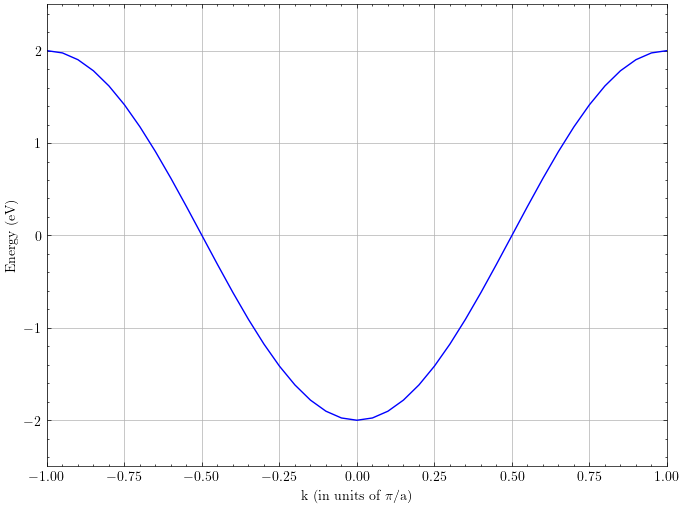

In [9]:
plt.figure(figsize=(8,6))

E_0 = 0
E_ss = -1
k = np.arange(-1, 1.05, 0.05)
E = E_0 + 2*E_ss*np.cos(np.pi*k)

plt.plot(k, E, 'b')
plt.xlim(-1,1)
plt.ylim(-2.5,2.5)
plt.xlabel('k (in units of 'r'$\pi$/a)')
plt.ylabel('Energy (eV)')
plt.grid(True)
plt.savefig("1D_chain.png")
plt.show()

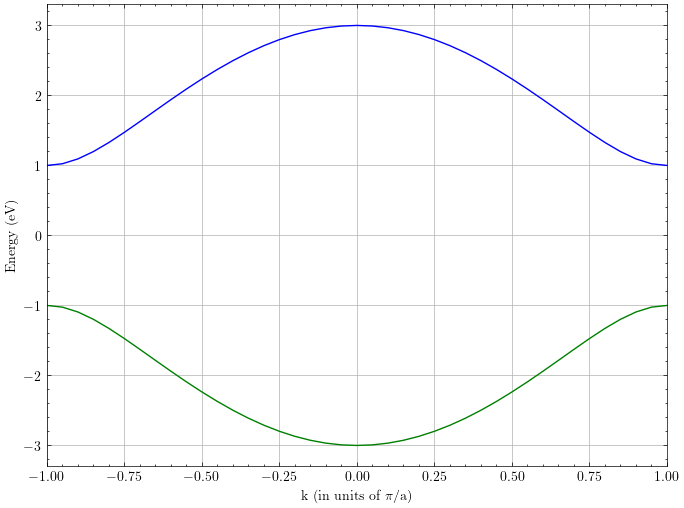

In [10]:
plt.figure(figsize=(8,6))

E_0 = 0
w = 2  # E_ss
v = 1  # E_ss'
k = np.arange(-1, 1.05, 0.05)
E_c = E_0 + np.sqrt(w**2 + v**2 + 2*w*v*np.cos(np.pi*k))
E_v = E_0 - np.sqrt(w**2 + v**2 + 2*w*v*np.cos(np.pi*k))

plt.plot(k, E_c, 'b')
plt.plot(k, E_v, 'g')
plt.xlim(-1,1)
plt.xlabel('k (in units of 'r'$\pi$/a)')
plt.ylabel('Energy (eV)')
plt.grid(True)
plt.savefig("ssh.png")
plt.show()

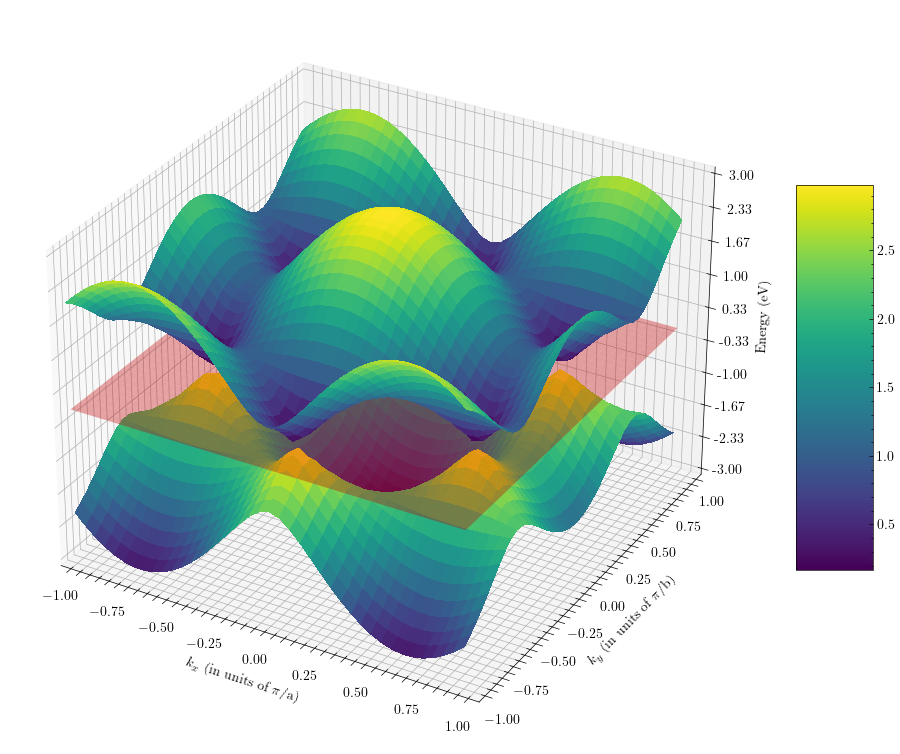

In [8]:
# Graphene band diagram (3D visualisation)

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

t = 1.0
X = np.arange(-1, 1, 0.05)
Y = np.arange(-1, 1, 0.05)
X, Y = np.meshgrid(X, Y)
Z_c = t*np.sqrt(1 + 4*np.cos(3*np.pi*X/2)*np.cos(np.sqrt(3)*np.pi*Y/2) + 4*(np.cos(np.sqrt(3)*np.pi*Y/2))**2)
Z_v = -Z_c

surf_c = ax.plot_surface(X, Y, Z_c, cmap=cm.viridis, linewidth=0, antialiased=False)
surf_v = ax.plot_surface(X, Y, Z_v, cmap=cm.viridis, linewidth=0, antialiased=False)

Z_plane = np.zeros_like(Z_c)
ax.plot_surface(X, Y, Z_plane, color='red', alpha=0.35)

# ax.set_zlim(-1.01, 1.01)
ax.set_xlim(-1.01, 1.01)
ax.set_ylim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
# ax.view_init(elev=10, azim=-30)  # to change the orientation
ax.set_zlabel('Energy (eV)')
ax.set_xlabel(r'$k_{x}$ ''(in units of ' r'$\pi$/a)')
ax.set_ylabel(r'$k_{y}$ ''(in units of ' r'$\pi$/b)')

fig.colorbar(surf_c, shrink=0.5, aspect=5)
plt.show()

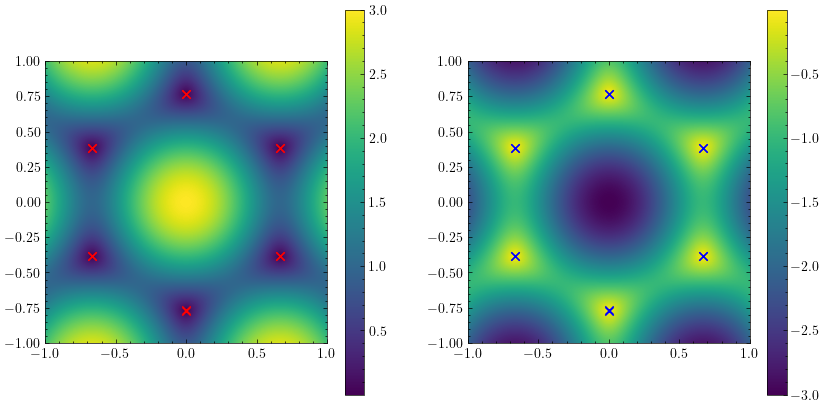

In [7]:
# Location of valleys in graphene bandstructure

t = 1.0

def f(x, y):
  return t*np.sqrt(1 + 4*np.cos(3*np.pi*X/2)*np.cos(np.sqrt(3)*np.pi*Y/2) + 4*(np.cos(np.sqrt(3)*np.pi*Y/2))**2)

x = np.arange(-1, 1, 5e-4)
y = np.arange(-1, 1, 5e-4)
X, Y = np.meshgrid(x, y)

E_c = f(X, Y)
E_v = -E_c

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(E_c, extent=[-1, 1, -1, 1], origin='lower', cmap='viridis')
axs[1].imshow(E_v, extent=[-1, 1, -1, 1], origin='lower', cmap='viridis')

threshold = np.min(E_c) + 1e-3
minima = np.where(E_c <= threshold)

x_min = x[minima[1]]
y_min = y[minima[0]]

for x, y in zip(x_min, y_min):
    axs[0].scatter(x, y, color='red', marker='x')
    axs[1].scatter(x, y, color='blue', marker='x')

fig.colorbar(axs[0].imshow(E_c, extent=[-1, 1, -1, 1], origin='lower', cmap='viridis'), ax=axs[0])
fig.colorbar(axs[1].imshow(E_v, extent=[-1, 1, -1, 1], origin='lower', cmap='viridis'), ax=axs[1])

plt.savefig("graphene_2D.png")
plt.show()

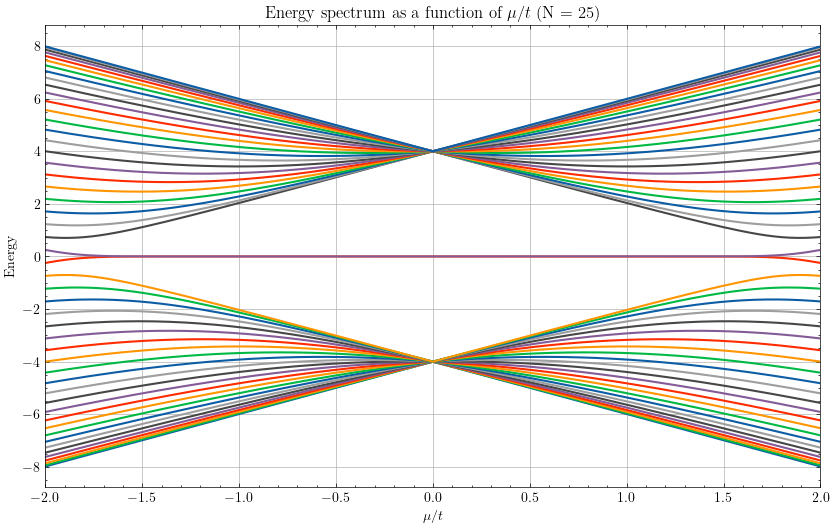

In [7]:
# Energy spectrum of a finite Kitaev chain

plt.figure(figsize=(10,6))

mu = 0.0
t = 2.0
Delta = 2.0
Nsites = 25

def kitaev(Nsites, mu, t, Delta):
    
    C = np.zeros([Nsites,Nsites])       # Diagonal block of Kitaev H
    S = np.zeros([Nsites,Nsites])       # Cross-diagonal block of Kitaev H
    
    for n in range(Nsites-1):
           S[n+1,n] = -Delta
           S[n,n+1] = Delta
    
    for n in range(Nsites):
        C[n,n] = -mu
        if n < Nsites-1:
            C[n,n+1] = -t
            C[n+1,n] = -t

    H = np.block([[C,S],[np.conjugate(S).T,-C]])
    return H

mu_vals = np.linspace(-4,4,201)
energy_vals = np.zeros([len(mu_vals),2*Nsites])

for i in range(len(mu_vals)):
    energy_vals[i] = la.eigh(kitaev(Nsites, mu_vals[i], t, Delta))[0]

plt.title("Energy spectrum as a function of $\mu/t$ (N = 25)")
for i in range(2*Nsites):
    plt.plot(mu_vals/t,energy_vals[:,i],linewidth=1.5)
plt.ylabel('Energy')
plt.xlabel('$\mu/t$')
plt.xlim(-mu_vals[200]/t,mu_vals[200]/t)
plt.grid(True)
plt.savefig("KC.png")
plt.show()

In [23]:
## Slider does not work in Jupyter environment for some reason, does work in Colab Notebook

# import numpy as np
# import matplotlib.pyplot as plt
# import ipywidgets as widgets
# from IPython.display import display
# import scipy.linalg as la

# def kitaev(Nsites, mu, t, Delta):
#     C = np.zeros([Nsites, Nsites])       # Diagonal block of Kitaev H
#     S = np.zeros([Nsites, Nsites])       # Cross-diagonal block of Kitaev H
    
#     for n in range(Nsites - 1):
#         S[n + 1, n] = -Delta
#         S[n, n + 1] = Delta
    
#     for n in range(Nsites):
#         C[n, n] = -mu
#         if n < Nsites - 1:
#             C[n, n + 1] = -t
#             C[n + 1, n] = -t

#     H = np.block([[C, S], [np.conjugate(S).T, -C]])
#     return H

# Nsites = 25
# t = 2.0
# Delta = 2.0
# mu_vals = np.linspace(0, 4, 101)
# energy_vals = np.zeros([len(mu_vals), 2 * Nsites])

# for i in range(len(mu_vals)):
#     energy_vals[i] = la.eigh(kitaev(Nsites, mu_vals[i], t, Delta))[0]

# def update_plot(mu):
#     plt.figure(figsize=(10, 6))
#     plt.title("Energy spectrum as a function of $\mu/t$ (N = 25)")
#     for i in range(2*Nsites):
#         plt.plot(mu_vals/t, energy_vals[:, i])
#     plt.axvline(x=mu, color='r', linestyle='--')
#     plt.ylabel('Energy')
#     plt.xlabel('$\mu/t$')
#     plt.xlim(-0.1,mu_vals[100]/t)
#     plt.grid(True)
#     plt.show()

# mu_slider = widgets.FloatSlider(value=0, min=0, max=4/t, step=0.01, description='μ')

# widgets.interact(update_plot, mu=mu_slider)
# display(mu_slider)

In [22]:
# # Simulating transport in N-S junction 

# def BTK_IE(E, VV, t, eta, Nsites, mu_f, alpha1, alpha2, beta, kT, U):
#     q = 1
#     hbar = 1
    
#     # Surface Green's functions
#     ig1 = (E+1j*eta)*np.identity(2)-alpha1
#     ig2 = (E+1j*eta)*np.identity(2)-alpha2

#     gs1 = sla.inv(ig1)
#     gs2 = sla.inv(ig2) 

#     delta = 1
#     # Recursive calculation of Surface Green's function
#     while delta>1e-8:
#         Gs = sla.inv(ig1-np.conjugate(beta).T*gs1*beta)
#         delta = np.sum(np.abs(Gs-gs1))/np.sum(np.abs(Gs+gs1))
#         gs1 = 0.5*Gs+0.5*gs1

#     delta = 1
#     while delta>1e-8:
#         Gs = sla.inv(ig2-np.conjugate(beta).T*gs2*beta)
#         delta = np.sum(np.abs(Gs-gs2))/np.sum(np.abs(Gs+gs2))
#         gs2 = 0.5*Gs+0.5*gs2

#     # Hamiltonian for N-region
#     alpha = np.array([[2*t-mu_F+U, 0], [0, -2*t+mu_F-U]])
#     H = np.zeros([2*Nsites, 2*Nsites])
    
#     for i in range(Nsites):
#         H[2*i:2*(i+1), 2*i:2*(i+1)] = alpha

#     for i in range(Nsites-1):
#         H[2*i:2*(i+1), 2*(i+1):2*(i+2)] = beta
#         H[2*(i+1):2*(i+2), 2*i:2*(i+1)] = beta

#     # Self-energy and broadening matrix
#     sig1 = (np.conjugate(beta).T*gs1*beta)
#     gam1 = 1j*(sig1-np.conjugate(sig1).T)
#     sig2 = (np.conjugate(beta).T*gs2*beta)
#     gam2 = 1j*(sig2-np.conjugate(sig2).T)

#     Sigma1 = np.zeros([2*Nsites, 2*Nsites])
#     Sigma2 = np.zeros([2*Nsites, 2*Nsites])

#     Sigma1[0:2, 0:2] = sig1
#     Sigma1[2*(Nsites-1):2*Nsites, 2*(Nsites-1):2*Nsites] = sig1
#     Sigma2[0:2, 0:2] = sig2
#     Sigma2[2*(Nsites-1):2*Nsites, 2*(Nsites-1):2*Nsites] = sig2

#     Gamma1 = 1j*(Sigma1-np.conjugate(Sigma1).T)
#     Gamma2 = 1j*(Sigma2-np.conjugate(Sigma2).T)

#     GD = sla.inv((E+1j*eta)*np.identity(2*Nsites)-H-np.real(Sigma1)-1j*np.imag(Sigma1)-np.real(Sigma2)-1j*np.imag(Sigma2))
#     A = 1j*(GD-np.conjugate(GD).T)     # check, prolly missing a hbar over here
#     DOS = np.trace(A)

#     fermi1e = 1.0/(1.0+np.exp((E-VV)/kT))
#     fermi1h = 1.0/(1.0+np.exp((E+VV)/kT))

#     fermi2e = 1.0/(1.0+np.exp(E/kT))
#     fermi2h = 1.0/(1.0+np.exp(E/kT))

#     Fermi_matrix1 = np.array([[fermi1e, 0],[0, fermi1h]])
#     Fermi_matrix2 = np.array([[fermi2e, 0],[0, fermi2h]])

#     Fermi1 = np.kron(np.identity(Nsites), Fermi_matrix1)
#     Fermi2 = np.kron(np.identity(Nsites), Fermi_matrix2)

#     Sigma_corr = Gamma1*Fermi1+Gamma2*Fermi2
#     G_corr = GD*Sigma_corr*np.conjugate(Sigma_corr).T

#     I_op = (1j*q/hbar)*(H*G_corr-G_corr*H)
#     I = I_op[1,1]-I_op[2,2]
    
#     return I

In [13]:
# plt.figure(figsize=(10,6))

# q = 1
# hbar = 1
# kT = 1e-5
# Delta1 = 0
# Delta2 = 1e-3
# t = 1.7
# mu_F = 2*t

# E = np.linspace(-2*Delta2, 2*Delta2, 1001)
# eta = 1e-6
# Nsites = 3
# V = np.linspace(0, 2*Delta2, 7)

# UB_array = np.array([0.5*t])
# I1_all = np.zeros([len(UB_array), len(V)])
# G1_all = np.zeros([len(UB_array), len(V)-1])

# for u in range(len(UB_array)):
#     UB = UB_array[u]
#     for k in range(len(V)):
#         for i in range(len(E)):
#             alpha1 = np.array([[2*t-mu_F, Delta1],[np.conjugate(Delta1).T, -2*t+mu_F]])
#             alpha2 = np.array([[2*t-mu_F, Delta2],[np.conjugate(Delta2).T, -2*t+mu_F]])
#             beta = np.array([[-t, 0],[0, t]])
#             U = UB
#             I_E = lambda E_val: BTK_IE(E_val, V[k], t, eta, Nsites, mu_F, alpha1, alpha2, beta, kT, U)
#             I1_all[u, k] = quad(I_E, -1*np.abs(V[k]), 1*np.abs(V[k]), epsabs=1e-8)[0]

# for u in range(len(UB_array)):
#     plt.plot(V/Delta2, np.real(I1_all[u, :])/Delta2)
    
# plt.title('I-V Characteristics')  
# plt.ylabel('Current $(e\Delta_0/\hbar)$')
# plt.xlabel('Bias $(eV/\Delta_0)$')  
# plt.legend(['U = 0.5t'])

# plt.show()

In [48]:
# LINEAR TRANSPORT REGIME

In [2]:
plt.style.use(['science','ieee'])

In [3]:
def xj(mu, m, p, j):

    Rplus = (-mu + np.sqrt(mu**2-4*m*p+0j))/(2*p)
    Rminus = (-mu - np.sqrt(mu**2-4*m*p+0j))/(2*p)
    denom = Rplus-Rminus

    if np.isclose(denom, 0):
        xj = (j+1)*(-mu/2*p)**j
        return xj
        
    xj = (Rplus**(j+1)-Rminus**(j+1))/denom
    return xj

In [4]:
def polyq(p, gammaL, gammaR, s, Nsites, x0, x1, x2):
    
    polyq = p**(Nsites-2)*(s*p**2*x0 + 1j*p*x1*(s*gammaL-gammaR) + x2*gammaL*gammaR)
    return abs(polyq)

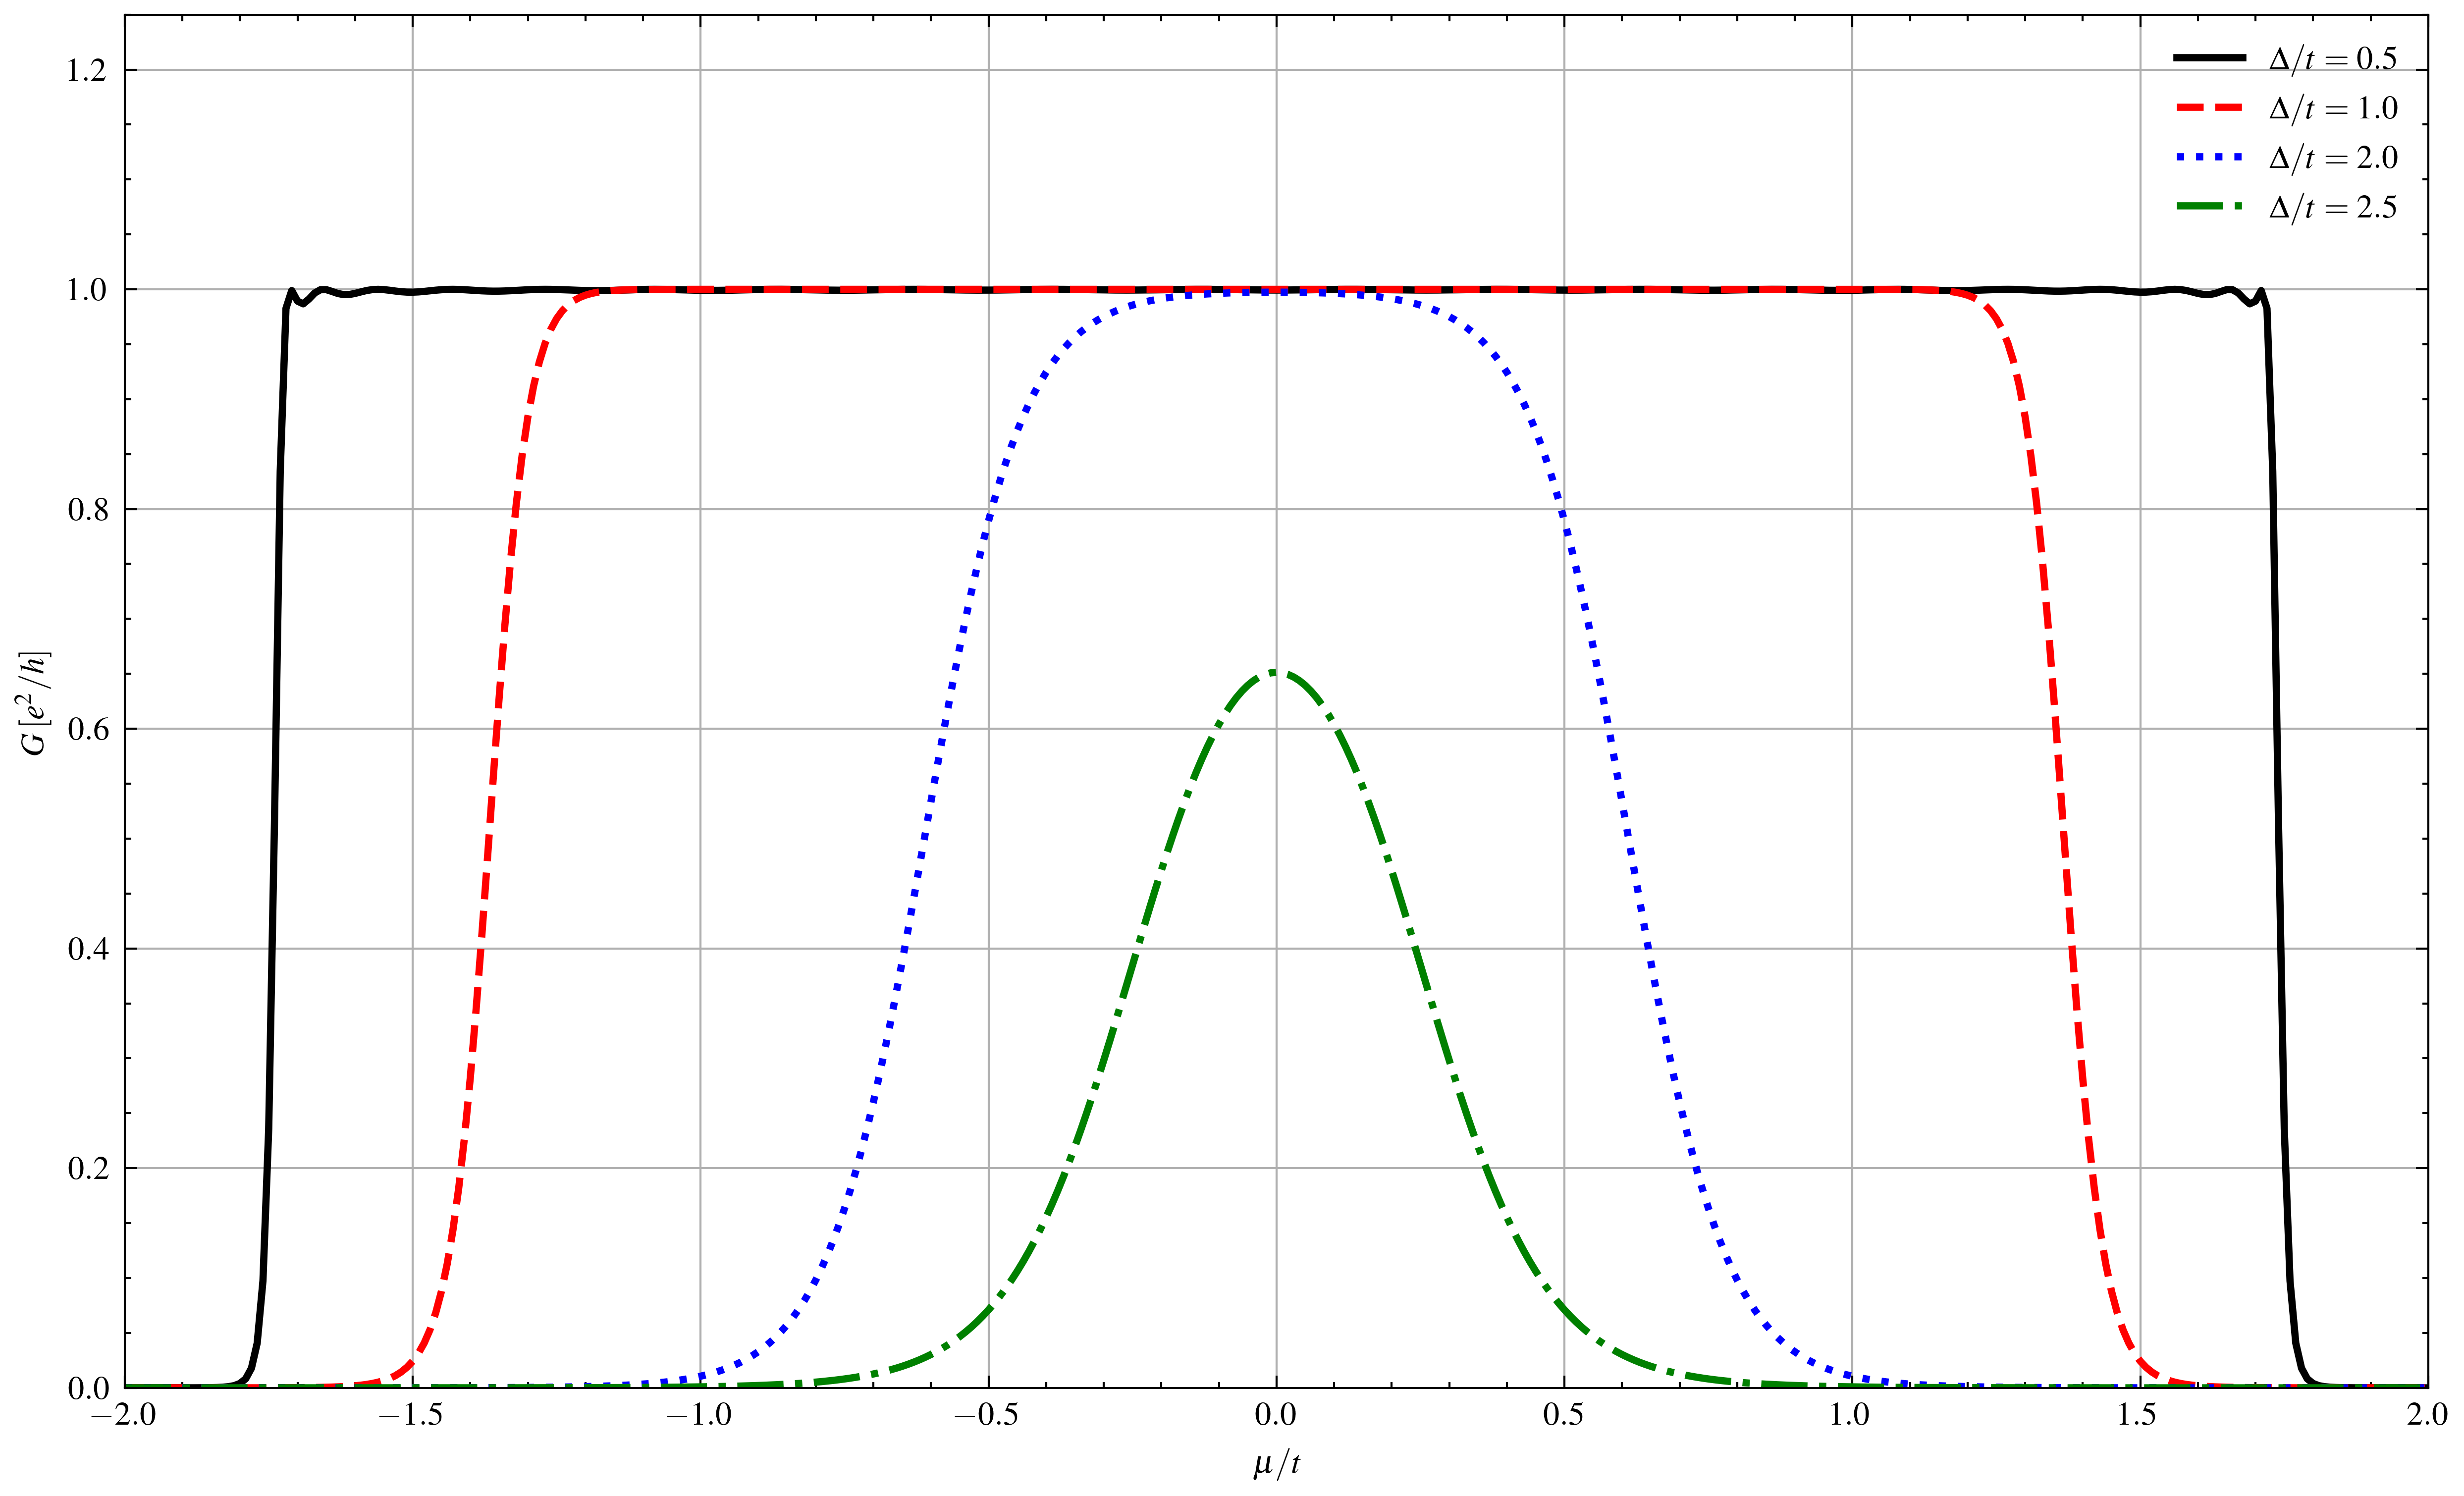

In [5]:
# Linear transport in Kitaev chain (T -> 0 K, V -> 0)

plt.figure(figsize=(10,6))

e = 1.0
h = 1.0
mu = 0.0
t = 2.0
Delta = 2.0
Nsites = 20
gammaL = 1e-3*t
gammaR = 1e-3*t  
# p = t+Delta
# m = t-Delta

mu_vals = np.linspace(-2*t,2*t,401)
Delta_vals = np.array([0.5*t, t, 2*t, 2.5*t])

p_vals = np.zeros(len(Delta_vals))
m_vals = np.zeros(len(Delta_vals))
GD_vals = np.zeros([len(mu_vals), len(Delta_vals)])    # direct transport
GA_vals = np.zeros([len(mu_vals), len(Delta_vals)])    # Andreev reflection
G_vals = np.zeros([len(mu_vals), len(Delta_vals)])     # total conductance

for i in range(len(Delta_vals)):
    p_vals[i] = t + Delta_vals[i]
    m_vals[i] = t - Delta_vals[i]
    
    for j in range(len(mu_vals)):
        x0 = xj(mu_vals[j], m_vals[i], p_vals[i], Nsites)
        x1 = xj(mu_vals[j], m_vals[i], p_vals[i], Nsites-1)
        x2 = xj(mu_vals[j], m_vals[i], p_vals[i], Nsites-2)

        qplus = polyq(p_vals[i], gammaL, gammaR, 1, Nsites, x0, x1, x2)
        qminus = polyq(p_vals[i], gammaL, gammaR, -1, Nsites, x0, x1, x2) 
        
        GD_vals[j][i] = ((gammaL*gammaR*(p_vals[i]**(Nsites-1)+m_vals[i]**(Nsites-1))**2)/(qplus**2+gammaL*gammaR*(p_vals[i]**(Nsites-1)+m_vals[i]**(Nsites-1))**2)**2)*(qminus**2)
        GA_vals[j][i] = ((gammaL**2*gammaR**2*(p_vals[i]**(2*Nsites-2)-m_vals[i]**(2*Nsites-2))**2)/(qplus**2+gammaL*gammaR*(p_vals[i]**(Nsites-1)+m_vals[i]**(Nsites-1))**2)**2)
        G_vals[j][i] = GD_vals[j][i] + GA_vals[j][i]

#plt.title("Conductance in units of $e^2/h$ for $\gamma_{L,R}/t = 0.001$, $N = 20$")
for m in range(len(Delta_vals)):
    interp_G = interp1d(mu_vals,G_vals[:,m],kind='cubic')
    G = interp_G(mu_vals)
    plt.plot(mu_vals/t,G,linewidth=1.75,label=f'$\Delta/t = {Delta_vals[m]/t}$')
plt.ylabel('$G \: [e^{2}/h]$')
plt.xlabel('$\mu/t$')
plt.xlim(-mu_vals[400]/t,mu_vals[400]/t)
plt.ylim(-0.0,1.25)
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("KC_conductance.png")
plt.show()

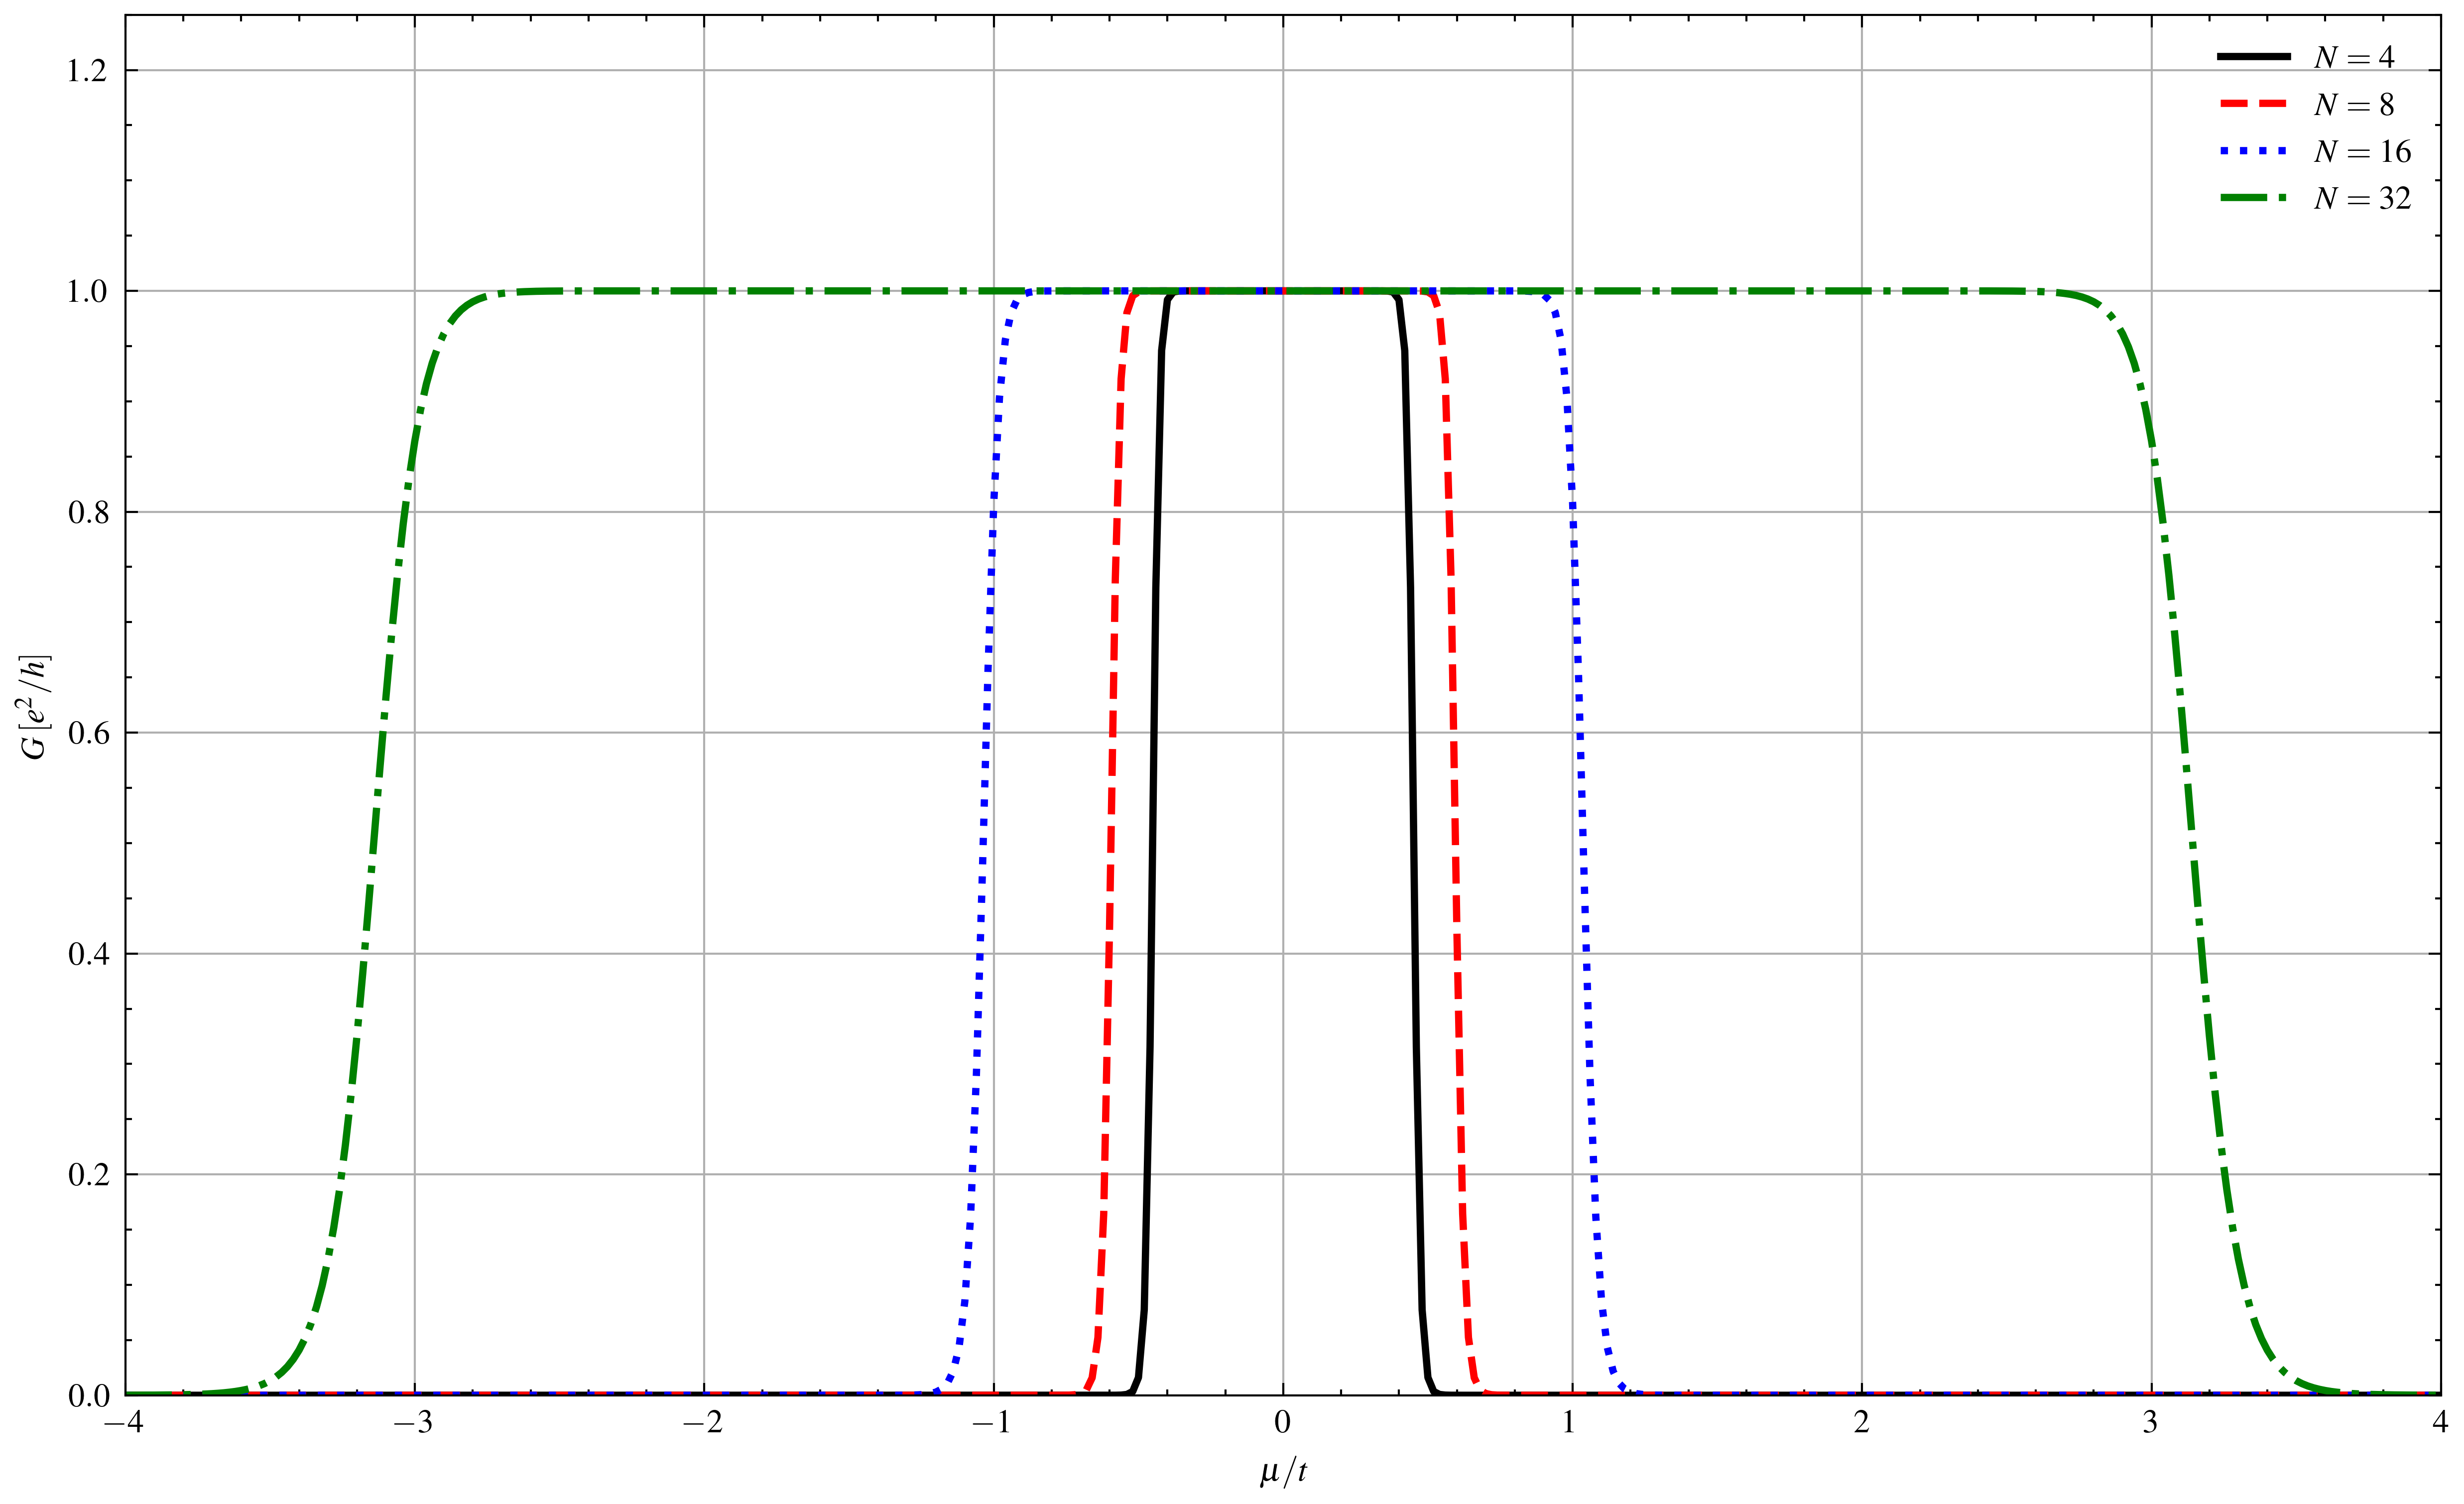

In [6]:
# Linear transport in Kitaev chain (T -> 0 K, V -> 0)

plt.figure(figsize=(10,6))

e = 1.0
h = 1.0
mu = 0.0
t = 2.0
Delta = 1.0*t
Nsites = 20
gammaL = 1e-3*t
gammaR = 1e-3*t  
p = t+Delta
m = t-Delta

mu_vals = np.linspace(-4*t,4*t,401)
Nsites_vals = np.array([4, 8, 16, 32])

GD_vals = np.zeros([len(mu_vals), len(Nsites_vals)])    # direct transport
GA_vals = np.zeros([len(mu_vals), len(Nsites_vals)])    # Andreev reflection
G_vals = np.zeros([len(mu_vals), len(Nsites_vals)])     # total conductance

for i in range(len(Nsites_vals)):
    
    for j in range(len(mu_vals)):
        x0 = xj(mu_vals[j], m, p, Nsites)
        x1 = xj(mu_vals[j], m, p, Nsites-1)
        x2 = xj(mu_vals[j], m, p, Nsites-2)

        qplus = polyq(p, gammaL, gammaR, 1, Nsites, x0, x1, x2)
        qminus = polyq(p, gammaL, gammaR, -1, Nsites, x0, x1, x2) 
        
        GD_vals[j][i] = ((gammaL*gammaR*(p**(Nsites_vals[i]-1)+m**(Nsites_vals[i]-1))**2)/(qplus**2+gammaL*gammaR*(p**(Nsites_vals[i]-1)+m**(Nsites_vals[i]-1))**2)**2)*(qminus**2)
        GA_vals[j][i] = ((gammaL**2*gammaR**2*(p**(2*Nsites_vals[i]-2)-m**(2*Nsites_vals[i]-2))**2)/(qplus**2+gammaL*gammaR*(p**(Nsites_vals[i]-1)+m**(Nsites_vals[i]-1))**2)**2)
        G_vals[j][i] = GD_vals[j][i] + GA_vals[j][i]

#plt.title("Conductance in units of $e^2/h$ for $\gamma_{L,R}/t = 0.001$, $\Delta/t = 1.0$")
for m in range(len(Nsites_vals)):
    interp_G = interp1d(mu_vals,G_vals[:,m],kind='cubic')
    G = interp_G(mu_vals)
    plt.plot(mu_vals/t,G,linewidth=1.75,label=f'$N = {Nsites_vals[m]}$')
plt.ylabel('$G \: [e^{2}/h]$')
plt.xlabel('$\mu/t$')
plt.xlim(-mu_vals[400]/t,mu_vals[400]/t)
plt.ylim(-0.0,1.25)
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("KC_Nsites_var.png")
plt.show()

In [7]:
plt.style.use(['science'])

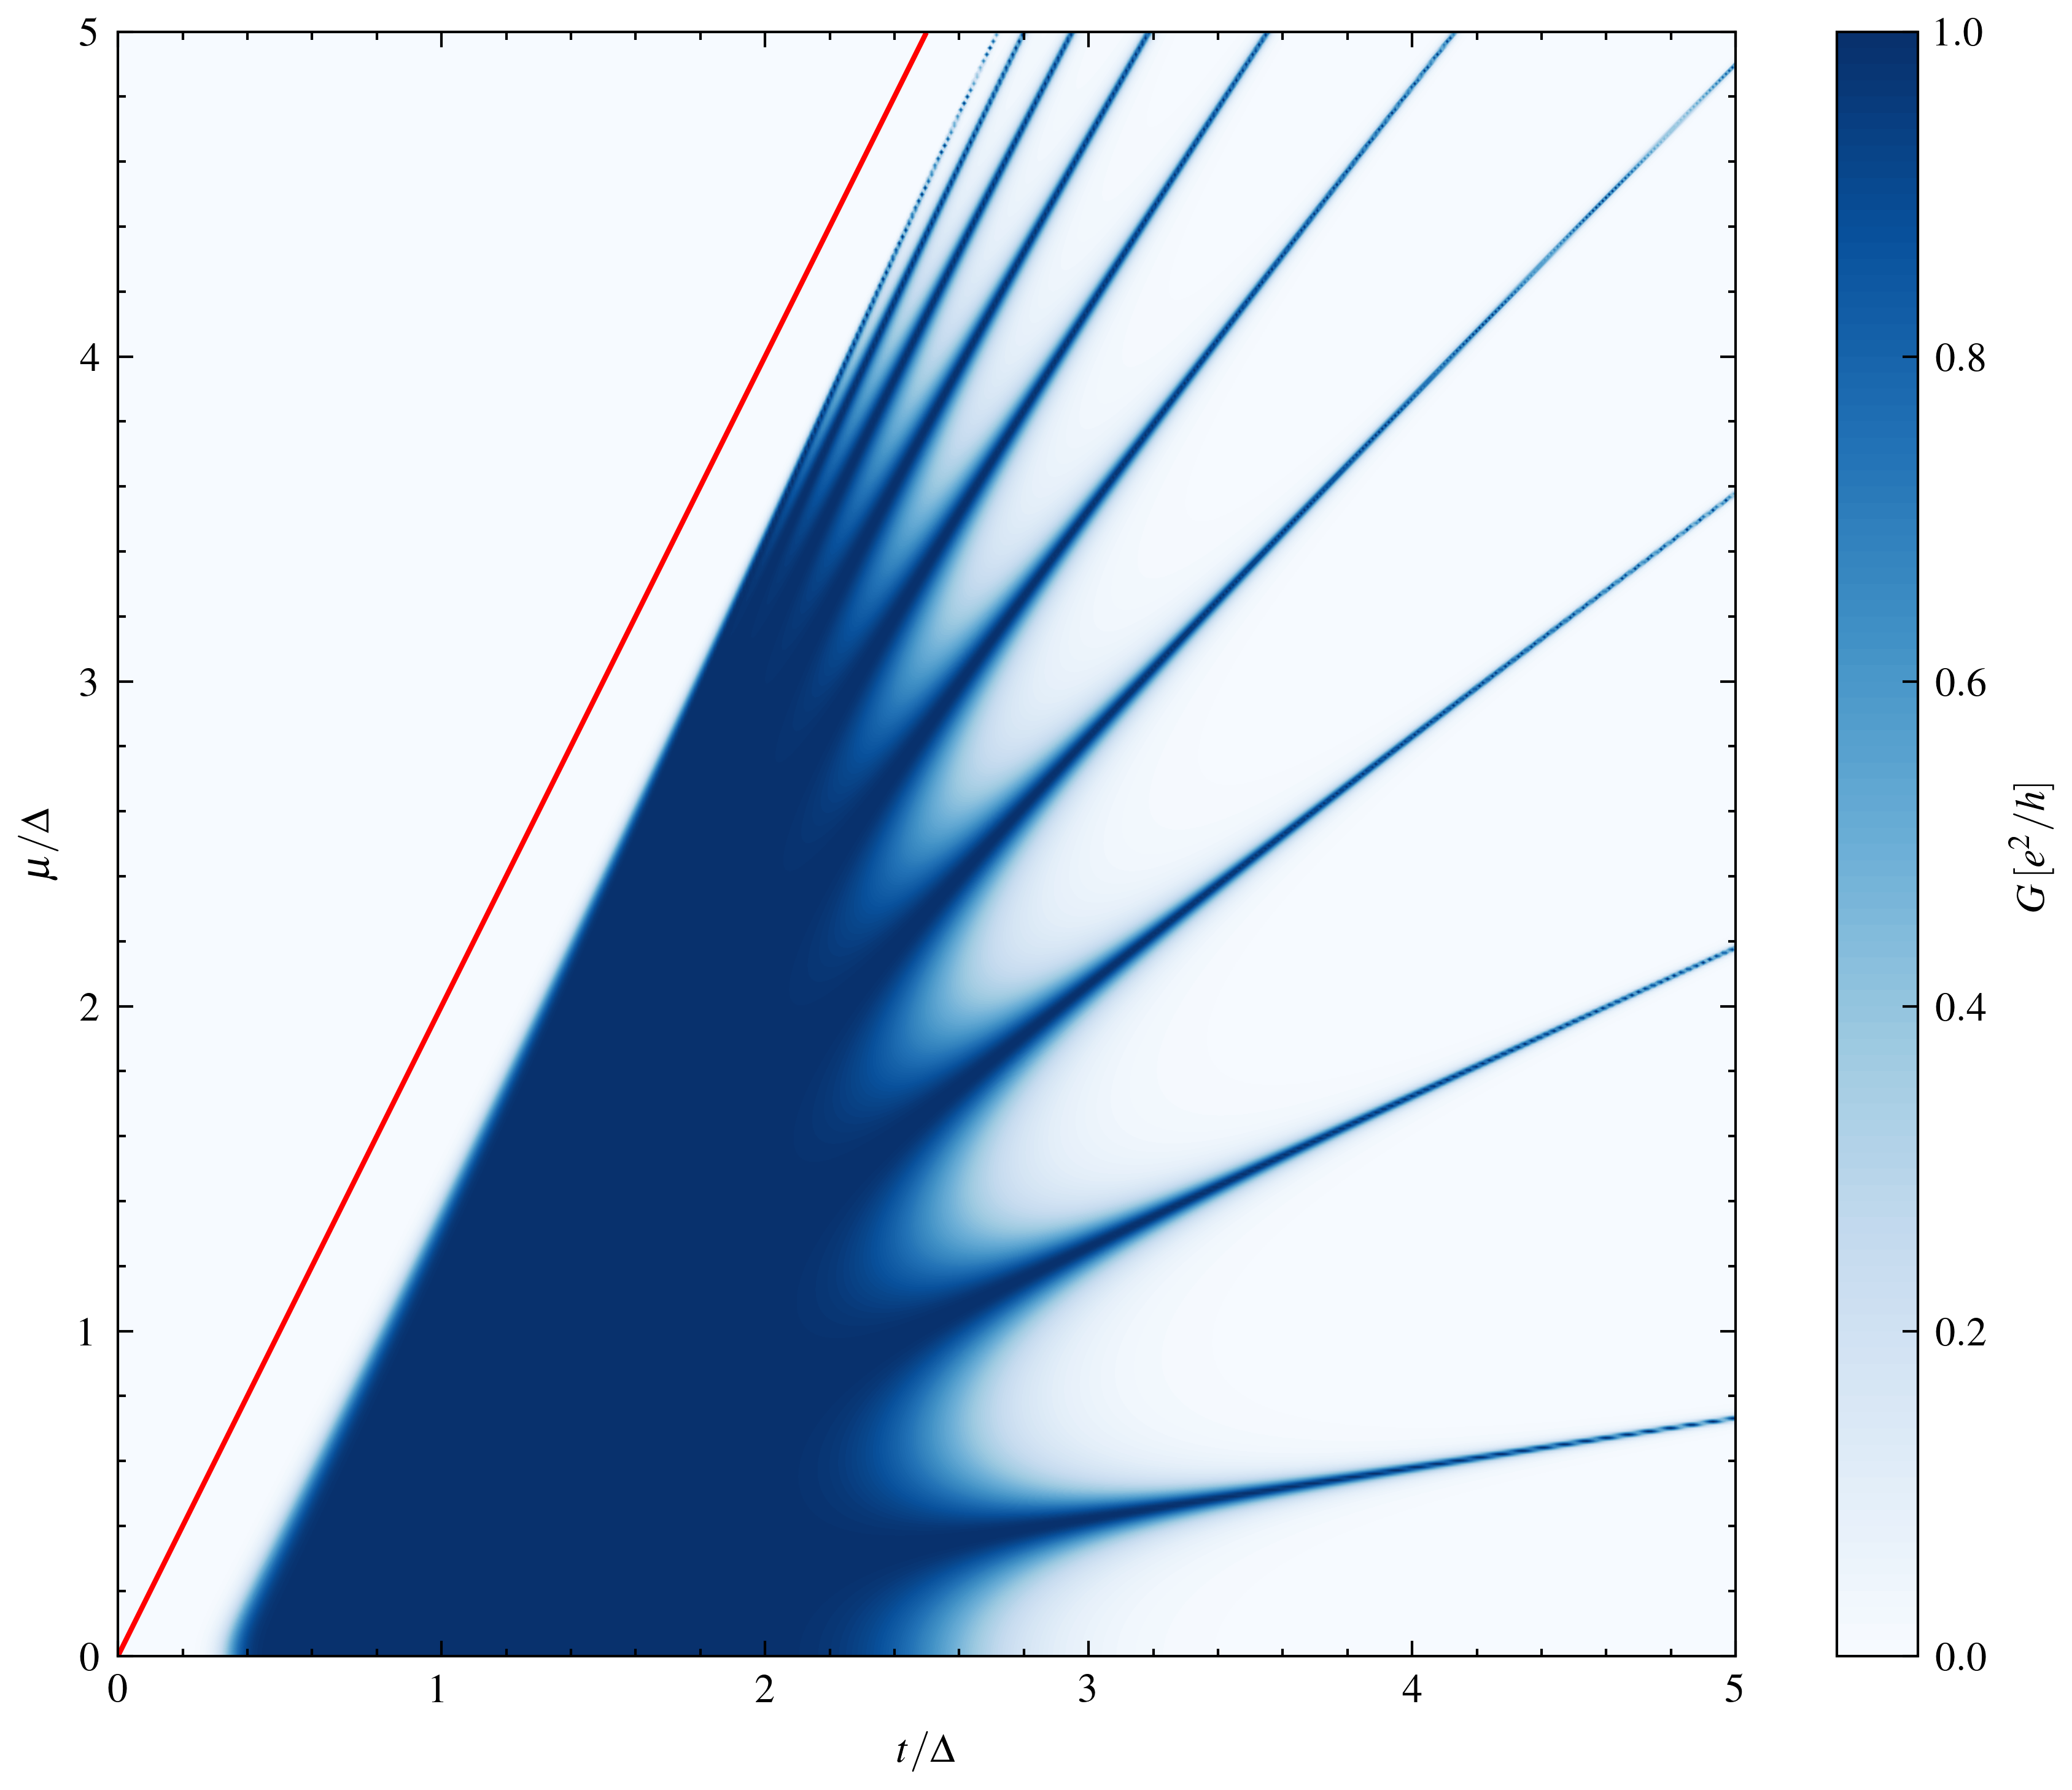

In [8]:
# Total conductance (finite Kitaev chain)

e = 1.0
h = 1.0
Delta = 1.0
gammaL = 0.001*Delta
gammaR = 0.001*Delta
Nsites = 20

def G(e, h, mu, t, Delta, Nsites, gammaL, gammaR):
    
    p = t+Delta
    m = t-Delta

    x0 = xj(mu, m, p, Nsites)
    x1 = xj(mu, m, p, Nsites-1)
    x2 = xj(mu, m, p, Nsites-2)
    
    qplus = polyq(p, gammaL, gammaR, 1, Nsites, x0, x1, x2)
    G_val = (gammaL*gammaR*(p**(Nsites-1)+m**(Nsites-1))**2)/(qplus**2+gammaL*gammaR*(p**(Nsites-1)+m**(Nsites-1))**2)
    return G_val


mu_vals = np.linspace(0,5*Delta,500)   # Y-axis 
t_vals = np.linspace(0,5*Delta,500)    # X-axis  
mu, t = np.meshgrid(mu_vals, t_vals)

t_max = 2.5*Delta
t_vals_trunc = t_vals[t_vals<=t_max]

G_vec = np.vectorize(G)
G_vals = G_vec(e, h, mu, t, Delta, Nsites, gammaL, gammaR)

plt.figure(figsize=(6,5))
contour = plt.contourf(t/Delta, mu/Delta, G_vals, levels=100, cmap='Blues', vmin=0, vmax=1) 

cbar = plt.colorbar(contour, ticks=np.arange(0, 1.1, 0.2))  
cbar.set_label(r'$G \:[e^{2}/h]$')

plt.xlabel(r'$t/\Delta$')
plt.ylabel(r'$\mu/\Delta$')
plt.plot(t_vals_trunc/Delta, 2*t_vals_trunc/Delta, color='red')
plt.tight_layout()
plt.savefig("KC_Gtot_cmap.png")
plt.show()

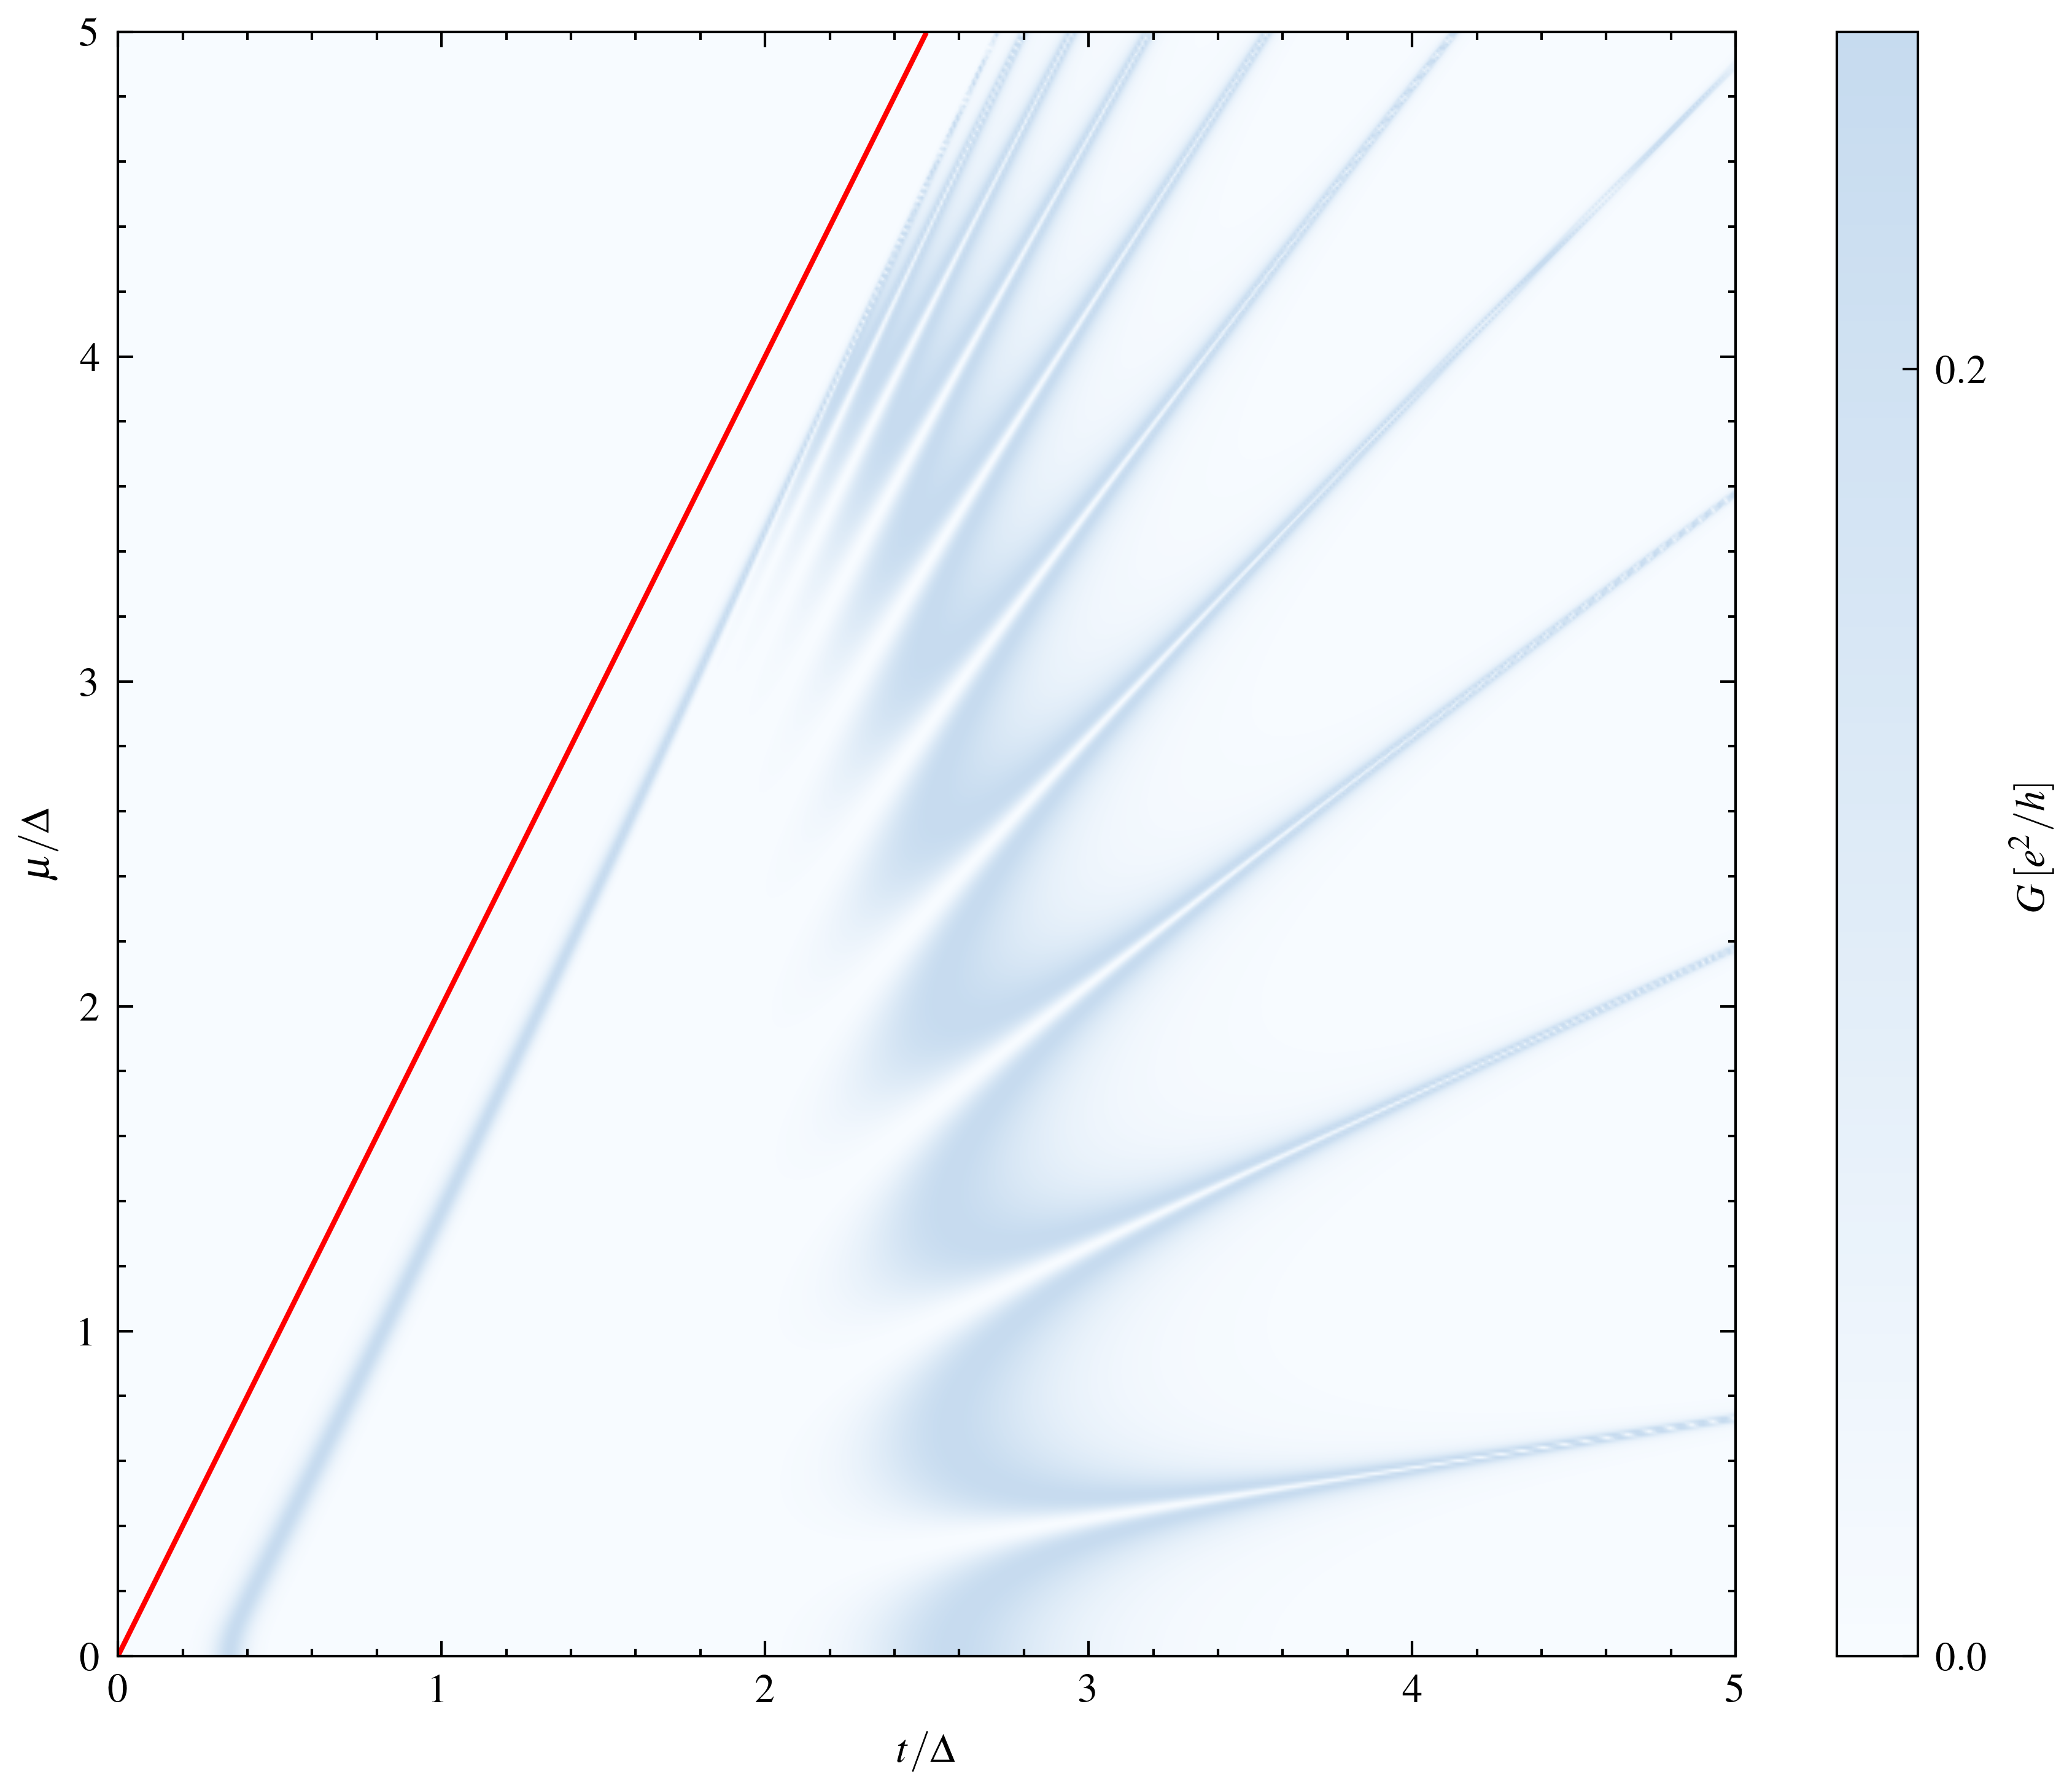

In [9]:
# Direct conductance term (finite Kitaev chain)

e = 1.0
h = 1.0
Delta = 1.0
gammaL = 0.001*Delta
gammaR = 0.001*Delta
Nsites = 20

def GD(e, h, mu, t, Delta, Nsites, gammaL, gammaR):
    
    p = t+Delta
    m = t-Delta

    x0 = xj(mu, m, p, Nsites)
    x1 = xj(mu, m, p, Nsites-1)
    x2 = xj(mu, m, p, Nsites-2)
    
    qplus = polyq(p, gammaL, gammaR, 1, Nsites, x0, x1, x2)
    qminus = polyq(p, gammaL, gammaR, -1, Nsites, x0, x1, x2)
    GD_val = ((gammaL*gammaR*(p**(Nsites-1)+m**(Nsites-1))**2)/(qplus**2+gammaL*gammaR*(p**(Nsites-1)+m**(Nsites-1))**2)**2)*(qminus**2)
    return GD_val


mu_vals = np.linspace(0,5*Delta,500)   # Y-axis 
t_vals = np.linspace(0,5*Delta,500)    # X-axis  
mu, t = np.meshgrid(mu_vals, t_vals)

t_max = 2.5*Delta
t_vals_trunc = t_vals[t_vals<=t_max]

GD_vec = np.vectorize(GD)
GD_vals = GD_vec(e, h, mu, t, Delta, Nsites, gammaL, gammaR)

plt.figure(figsize=(6,5))
contour = plt.contourf(t/Delta, mu/Delta, GD_vals, levels=100, cmap='Blues', vmin=0, vmax=1) 

cbar = plt.colorbar(contour, ticks=np.arange(0, 1.1, 0.2))  
cbar.set_label(r'$G \:[e^{2}/h]$')

plt.xlabel(r'$t/\Delta$')
plt.ylabel(r'$\mu/\Delta$')
plt.plot(t_vals_trunc/Delta, 2*t_vals_trunc/Delta, color='red')
plt.tight_layout()
plt.savefig("KC_GD_cmap.png")
plt.show()

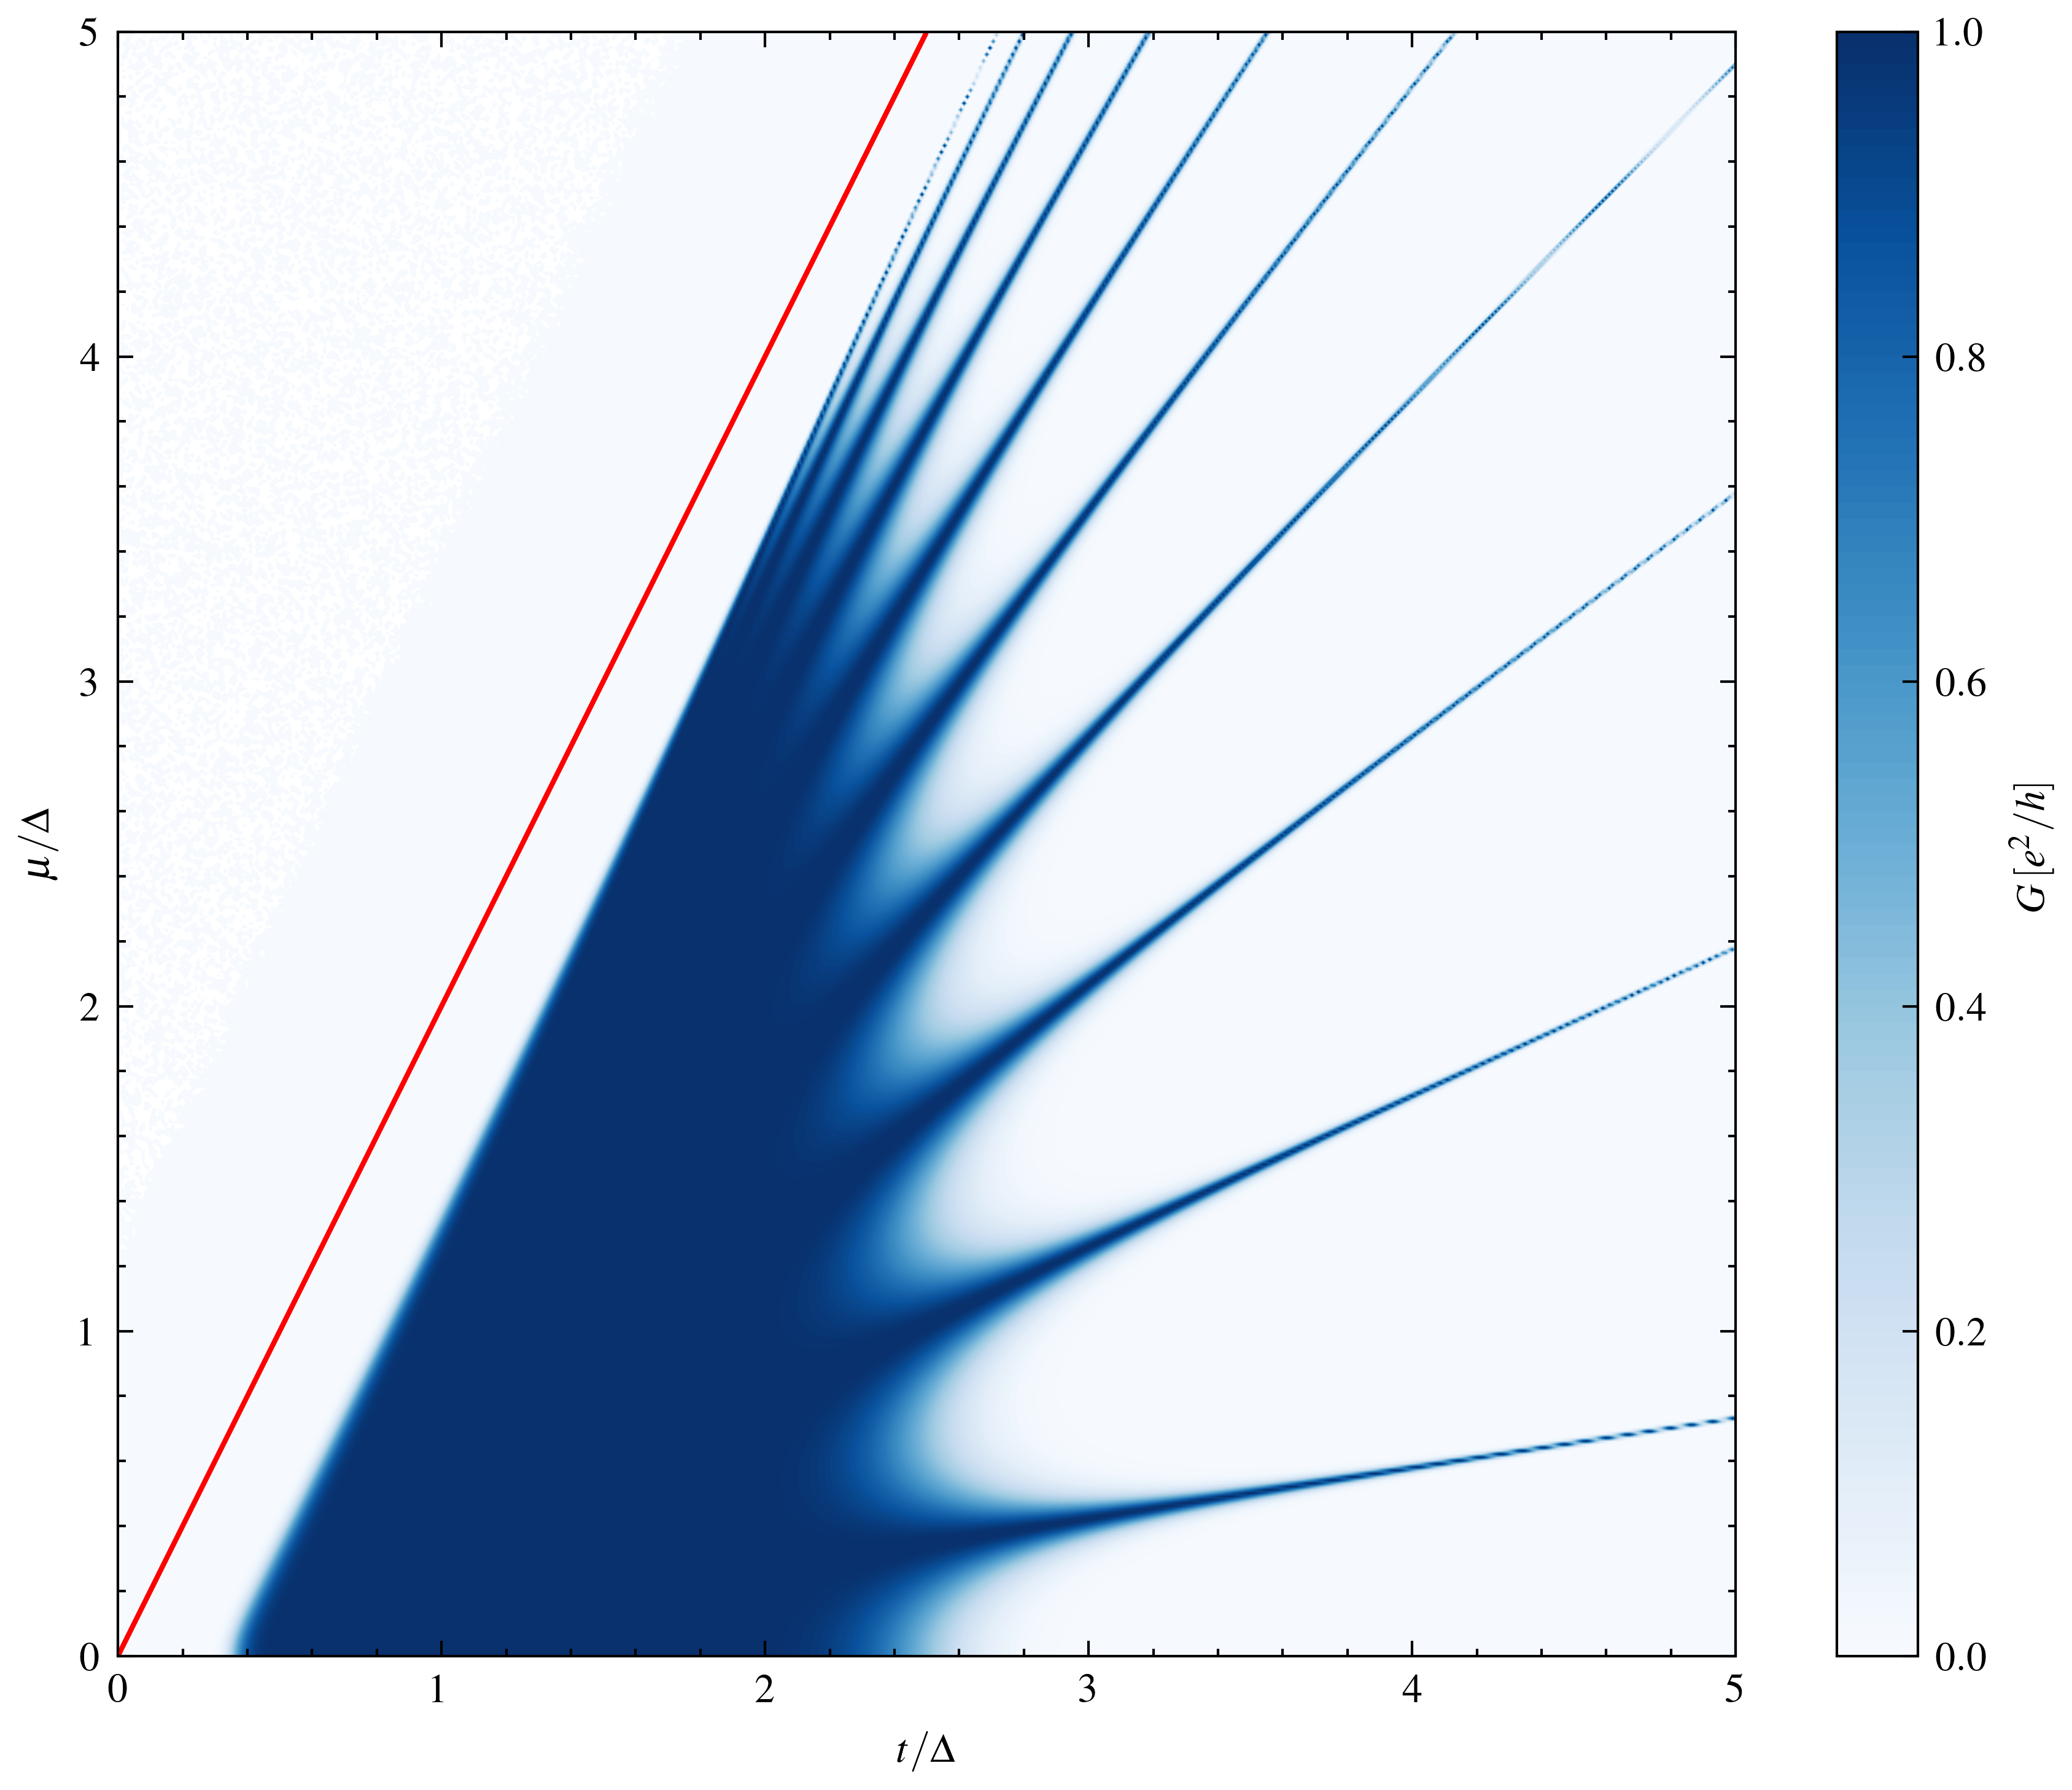

In [10]:
# Andreev conductance term (finite Kitaev chain)

e = 1.0
h = 1.0
Delta = 1.0
gammaL = 0.001*Delta
gammaR = 0.001*Delta
Nsites = 20

mu_vals = np.linspace(0,5*Delta,500)   # Y-axis 
t_vals = np.linspace(0,5*Delta,500)    # X-axis  
mu, t = np.meshgrid(mu_vals, t_vals)

t_max = 2.5*Delta
t_vals_trunc = t_vals[t_vals<=t_max]

GA_vals = G_vals-GD_vals

plt.figure(figsize=(6,5))
contour = plt.contourf(t/Delta, mu/Delta, GA_vals, levels=100, cmap='Blues', vmin=0, vmax=1) 

cbar = plt.colorbar(contour, ticks=np.arange(0, 1.1, 0.2))  
cbar.set_label(r'$G \:[e^{2}/h]$')

plt.xlabel(r'$t/\Delta$')
plt.ylabel(r'$\mu/\Delta$')
plt.plot(t_vals_trunc/Delta, 2*t_vals_trunc/Delta, color='red')
plt.tight_layout()
plt.savefig("KC_GA_cmap.png")
plt.show()

In [47]:
# NON-LINEAR TRANSPORT REGIME

In [27]:
def tetranacci(E, a, b, mu, Nsites, init):
    tnc = np.zeros(Nsites+3, dtype=complex)
    tnc[:4] = init

    for n in range(2, Nsites+1):
        tnc[n+2] = ((E**2+a**2+b**2-mu**2)/(a*b))*tnc[n] - tnc[n-2] + (1j*mu*((b-a)/(a*b)))*(tnc[n-1]-tnc[n+1])
        
    return tnc[-4:]

In [34]:
def djx(sigmaRp, sigmaRm, b, i0, i1, i2):
    dj = sigmaRp*i0 - 1j*sigmaRm*i1 + b*i2
    return dj

In [35]:
def djy(sigmaRp, sigmaRm, a, i0, i1, i2):
    dj = sigmaRp*i0 + 1j*sigmaRm*i1 + a*i2
    return dj

In [36]:
def det(sigmaLm, sigmaLp, sigmaRm, sigmaRp, a, b, x, y, chi, yeta, Nsites):
    
    d_y_N = djy(sigmaRp, sigmaRm, a, x[2], y[2], y[3])
    d_chi_N = djx(sigmaRp, sigmaRm, b, yeta[2], chi[2], chi[3])
    d_x_N = djx(sigmaRp, sigmaRm, b, y[2], x[2], x[3])
    d_yeta_N = djy(sigmaRp, sigmaRm, a, chi[2], yeta[2], yeta[3])
    d_y_N_1 = djy(sigmaRp, sigmaRm, a, x[1], y[1], y[2])
    d_chi_N_1 = djx(sigmaRp, sigmaRm, b, yeta[1], chi[1], chi[2])
    d_x_N_1 = djx(sigmaRp, sigmaRm, b, y[1], x[1], x[2])
    d_yeta_N_1 = djy(sigmaRp, sigmaRm, a, chi[1], yeta[1], yeta[2])

    det = (d_y_N*d_chi_N - d_x_N*d_yeta_N) + ((sigmaLm**2-sigmaLp**2)/(a*b))*(d_y_N_1*d_chi_N_1 - d_x_N_1*d_yeta_N_1) + (sigmaLp/b)*(d_y_N*d_x_N_1 - d_x_N*d_y_N_1) + (sigmaLp/a)*(d_chi_N*d_yeta_N_1 - d_yeta_N*d_chi_N_1) + (1j*sigmaLm/a)*(d_y_N*d_chi_N_1 - d_x_N*d_yeta_N_1) + (1j*sigmaLm/b)*(d_yeta_N*d_x_N_1 - d_chi_N*d_y_N_1)

    return det

In [37]:
# G(1,N) term

def G0(detM, a, b, x, y, chi, yeta, E, omegaL, mu):

    d_y_N_1 = djy(sigmaRp, sigmaRm, a, x[1], y[1], y[2])
    d_chi_N_1 = djx(sigmaRp, sigmaRm, b, yeta[1], chi[1], chi[2])
    d_x_N_1 = djx(sigmaRp, sigmaRm, b, y[1], x[1], x[2])
    d_yeta_N_1 = djy(sigmaRp, sigmaRm, a, chi[1], yeta[1], yeta[2])
    d_y_N_2 = djy(sigmaRp, sigmaRm, a, x[0], y[0], y[1])
    d_chi_N_2 = djx(sigmaRp, sigmaRm, b, yeta[0], chi[0], chi[1])
    d_x_N_2 = djx(sigmaRp, sigmaRm, b, y[0], x[0], x[1])
    d_yeta_N_2 = djy(sigmaRp, sigmaRm, a, chi[0], yeta[0], yeta[1])

    G0 = (b/a)*(d_chi_N_2 + 1j*d_yeta_N_2) + (a/b)*(d_y_N_2 - 1j*d_x_N_2) + (E-omegaL-mu)*((d_x_N_1 + 1j*d_y_N_1)/b + (d_yeta_N_1 - 1j*d_chi_N_1)/a)
    G0 = G0/(2*detM)

    return np.abs(G0)

In [38]:
# G(1,N+1) term

def G1(detM, a, b, x, y, chi, yeta):

    d_y_N_1 = djy(sigmaRp, sigmaRm, a, x[1], y[1], y[2])
    d_chi_N_1 = djx(sigmaRp, sigmaRm, b, yeta[1], chi[1], chi[2])
    d_x_N_1 = djx(sigmaRp, sigmaRm, b, y[1], x[1], x[2])
    d_yeta_N_1 = djy(sigmaRp, sigmaRm, a, chi[1], yeta[1], yeta[2])
    d_y_N_2 = djy(sigmaRp, sigmaRm, a, x[0], y[0], y[1])
    d_chi_N_2 = djx(sigmaRp, sigmaRm, b, yeta[0], chi[0], chi[1])
    d_x_N_2 = djx(sigmaRp, sigmaRm, b, y[0], x[0], x[1])
    d_yeta_N_2 = djy(sigmaRp, sigmaRm, a, chi[0], yeta[0], yeta[1])

    G1 = (b**2/a)*(d_yeta_N_2*d_chi_N_1 - d_yeta_N_1*d_chi_N_2) + (a**2/b)*(d_y_N_2*d_x_N_1 - d_y_N_1*d_x_N_2) + (1j*a)*(d_chi_N_1*d_y_N_2 - d_yeta_N_1*d_x_N_2) - (1j*b)*(d_x_N_1*d_yeta_N_2 - d_y_N_1*d_chi_N_2)
    G1 = G1/((-2*a*b)*detM)

    return np.abs(G1)

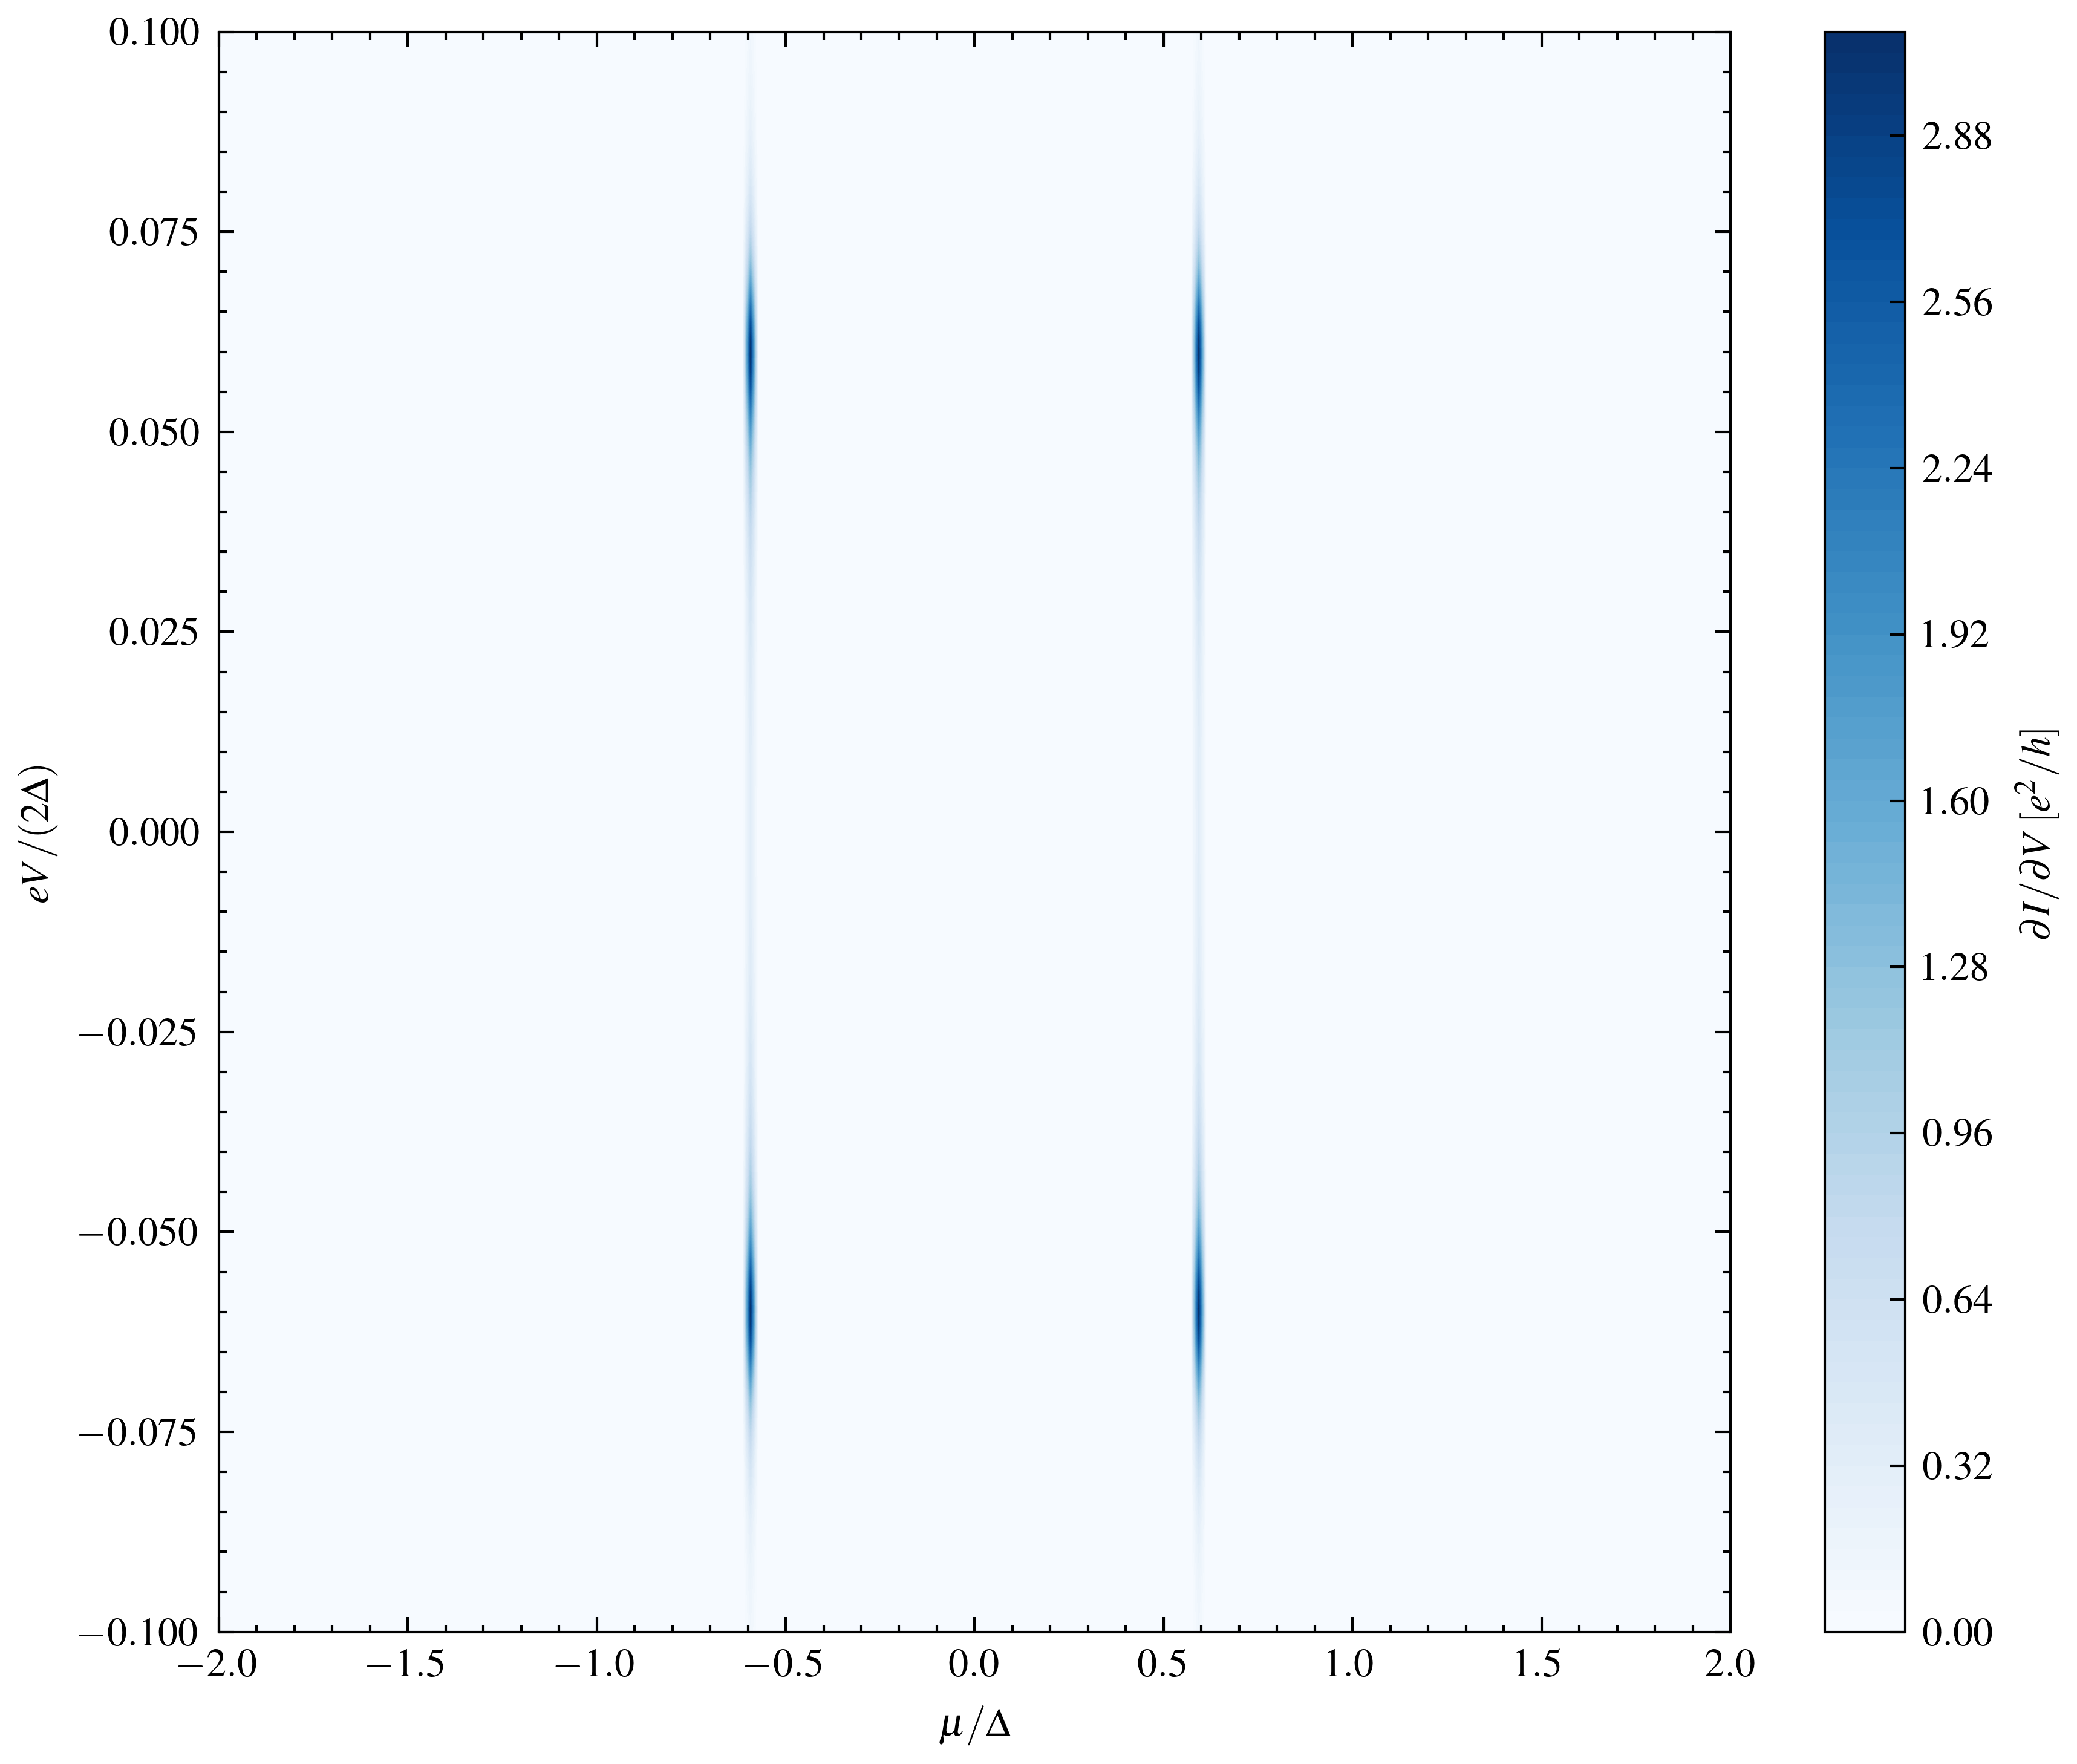

In [39]:
# Total conductance (finite Kitaev chain)

e = 1.0
h = 1.0
Delta = 1.0
t = 4.1*Delta
gammaL = 0.02*Delta
gammaR = 0.02*Delta
Nsites = 20

a = 1j*(Delta-t)
b = 1j*(Delta+t)

# Wide-band limit
sigmaLp = -1j*gammaL   
sigmaRp = -1j*gammaR
sigmaLm = 0
sigmaRm = 0

# V_vals = np.linspace(-20*Delta/e, 20*Delta/e, 200)
# mu_vals = np.linspace(-10*Delta, 10*Delta, 200)
V_vals = np.linspace(-0.2*Delta/e, 0.2*Delta/e, 100)
mu_vals = np.linspace(-2*Delta, 2*Delta, 200)
mu, V = np.meshgrid(mu_vals, V_vals)

Gr0_vals = np.zeros(mu.shape, dtype=complex)
Gr1_vals = np.zeros(mu.shape, dtype=complex)

for i in range(mu.shape[0]):             # loop over V
    for j in range(mu.shape[1]):         # loop over mu
        
        V_val = V[i,j]
        mu_val = mu[i,j]

        E_vals = [-V_val/2, V_val/2]

        Gr0 = 0
        Gr1 = 0

        for E_val in E_vals:
            
           # Tetranacci polynomials init values
            x_init = np.array([b/a, 0, 1, -1j*mu_val/b], dtype=complex)
            yeta_init = np.array([a/b, 0, 1, 1j*mu_val/a], dtype=complex)
            chi_init = np.array([0, 0, 0, E_val/b], dtype=complex)
            y_init = np.array([0, 0, 0, E_val/a], dtype=complex) 

           # Tetranacci recursion relation, returns (N-3), (N-2), (N-1) and Nth elements
            x = tetranacci(E_val, a, b, mu_val, Nsites, x_init)
            yeta = tetranacci(E_val, a, b, mu_val, Nsites, yeta_init)
            chi = tetranacci(E_val, a, b, mu_val, Nsites, chi_init)
            y =  tetranacci(E_val, a, b, mu_val, Nsites, y_init)

           # Defining the matrix determinant term
            detM = det(sigmaLm, sigmaLp, sigmaRm, sigmaRp, a, b, x, y, chi, yeta, Nsites)

           # Defining the G(1,N), G(1,N+1) term 
            Gr0 += (G0(detM, a, b, x, y, chi, yeta, E_val, -1j*gammaL, mu_val))**2
            Gr1 += (G1(detM, a, b, x, y, chi, yeta))**2

        Gr0_vals[i,j] = Gr0
        Gr1_vals[i,j] = Gr1

G_vals = 0.5*gammaL*(gammaR*Gr0_vals + gammaL*Gr1_vals) + 1e-8

plt.figure(figsize=(6,5))
contour = plt.contourf(mu/Delta, e*V/(2*Delta), np.abs(G_vals), levels=100, cmap='Blues')#, norm=LogNorm(vmin=1e-8,vmax=1))
cbar = plt.colorbar(label=r'$\partial I / \partial V \: [e^2/h]$')

plt.xlabel(r'$\mu / \Delta$')
plt.ylabel(r'$eV / (2\Delta)$')
plt.tight_layout()
plt.show()